In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [19]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Le dataset de test n'a pas l'outcome donc pour scorer le modèle ininteressant

In [20]:
train.drop(columns="id", axis=1, inplace=True)
test.drop(columns="id", axis=1, inplace=True)

In [21]:
train.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0     yes  adult           530001         38.1  132.0              24.0   
1     yes  adult           533836         37.5   88.0              12.0   
2     yes  adult           529812         38.3  120.0              28.0   
3     yes  adult          5262541         37.1   72.0              30.0   
4      no  adult          5299629         38.0   52.0              48.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced   dark_cyanotic            more_3_sec   
1                cool           normal   pale_cyanotic            more_3_sec   
2                cool          reduced       pale_pink            less_3_sec   
3                cold          reduced       pale_pink            more_3_sec   
4              normal           normal     normal_pink            less_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               57.0           8.5     serosanguious            3.4   
1  ...               33.0          64.0     serosanguious            2.0   
2  ...               37.0           6.4     serosanguious            3.4   
3  ...               53.0           7.0            cloudy            3.9   
4  ...               47.0           7.3            cloudy            2.6   

  surgical_lesion  lesion_1 lesion_2 lesion_3  cp_data     outcome  
0             yes      2209        0        0       no        died  
1             yes      2208        0        0       no  euthanized  
2             yes      5124        0        0       no       lived  
3             yes      2208        0        0      yes       lived  
4              no         0        0        0      yes       lived  

[5 rows x 28 columns]

In [22]:
test.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           534053         38.6   40.0              20.0   
1     yes  adult           528469         38.2  112.0              48.0   
2     yes  adult           528178         37.7   66.0              12.0   
3      no  adult           534784         37.1   88.0              20.0   
4     yes  adult           529840         38.3   50.0              12.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0              normal           normal     normal_pink            less_3_sec   
1                cool          reduced     bright_pink            more_3_sec   
2                cool           normal      bright_red            less_3_sec   
3                cool          reduced   pale_cyanotic            less_3_sec   
4                 NaN           normal     bright_pink            less_3_sec   

   ...        abdomen packed_cell_volume total_protein abdomo_appearance  \
0  ...  distend_small               42.0           7.5             clear   
1  ...  distend_small               44.0           6.0     serosanguious   
2  ...  distend_small               31.5           6.0            cloudy   
3  ...  distend_large               75.0          81.0               NaN   
4  ...  distend_small               37.0           6.8            cloudy   

  abdomo_protein  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0            2.3               no        0        0         0       no  
1            2.6               no     2208        0         0      yes  
2            1.6              yes     2205        0         0      yes  
3            1.0              yes     1400        0         0       no  
4            2.6              yes     2208        0         0      yes  

[5 rows x 27 columns]

In [23]:
train.shape, test.shape

((1235, 28), (824, 27))

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1212 non-null   object 
 13  nasogastric_tube       1155 non-null   object 
 14  nasogastric_reflux     1214 non-null   object 
 15  naso

In [25]:
train.describe()

hospital_number  rectal_temp        pulse  respiratory_rate  \
count     1.235000e+03  1235.000000  1235.000000       1235.000000   
mean      9.545004e+05    38.202186    79.574089         30.054251   
std       1.356403e+06     0.788668    29.108638         16.452066   
min       5.213990e+05    35.400000    30.000000          8.000000   
25%       5.288000e+05    37.800000    53.000000         18.000000   
50%       5.297770e+05    38.200000    76.000000         28.000000   
75%       5.341450e+05    38.600000   100.000000         36.000000   
max       5.305129e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count            1235.000000         1235.000000    1235.000000   
mean                4.382591           49.602429      21.388016   
std                 1.937357           10.535800      26.676453   
min                 1.000000           23.000000       3.500000   
25%                 2.000000           43.000000       6.600000   
50%                 4.500000           48.000000       7.500000   
75%                 6.000000           57.000000       9.100000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count     1235.000000   1235.000000  1235.000000  1235.000000  
mean         3.290931   3832.496356    14.612146     3.577328  
std          1.589195   5436.733774   193.705735    88.858953  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2205.000000     0.000000     0.000000  
50%          3.000000   2209.000000     0.000000     0.000000  
75%          4.300000   3205.000000     0.000000     0.000000  
max         10.100000  41110.000000  3112.000000  2209.000000

In [26]:
train.drop_duplicates(inplace=True)

In [27]:
fig = px.pie(train['outcome'].value_counts().reset_index(), values='count', names='outcome',
             title='Outcome distribution')
fig.show()

On peut voir que les classes ne sont pas réparties uniformément. 

In [28]:
train['hospital_number'].value_counts()

hospital_number
529461     46
528548     32
528996     21
5290409    20
529667     20
           ..
532985      1
527526      1
535415      1
5289419     1
530157      1
Name: count, Length: 255, dtype: int64

Hospital number correspond plutot à un type d'hopital, ça serait plutot une catégorie

In [29]:
cat_train = train.select_dtypes(include='object').columns.to_list()
num_train = train.select_dtypes(include=['int64', 'float64']).columns.to_list()

cat_test = test.select_dtypes(include='object').columns.to_list()
num_test = test.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [30]:
len(cat_train), len(num_train)

(17, 11)

# EDA

## Diff distribution train et test

### Num features

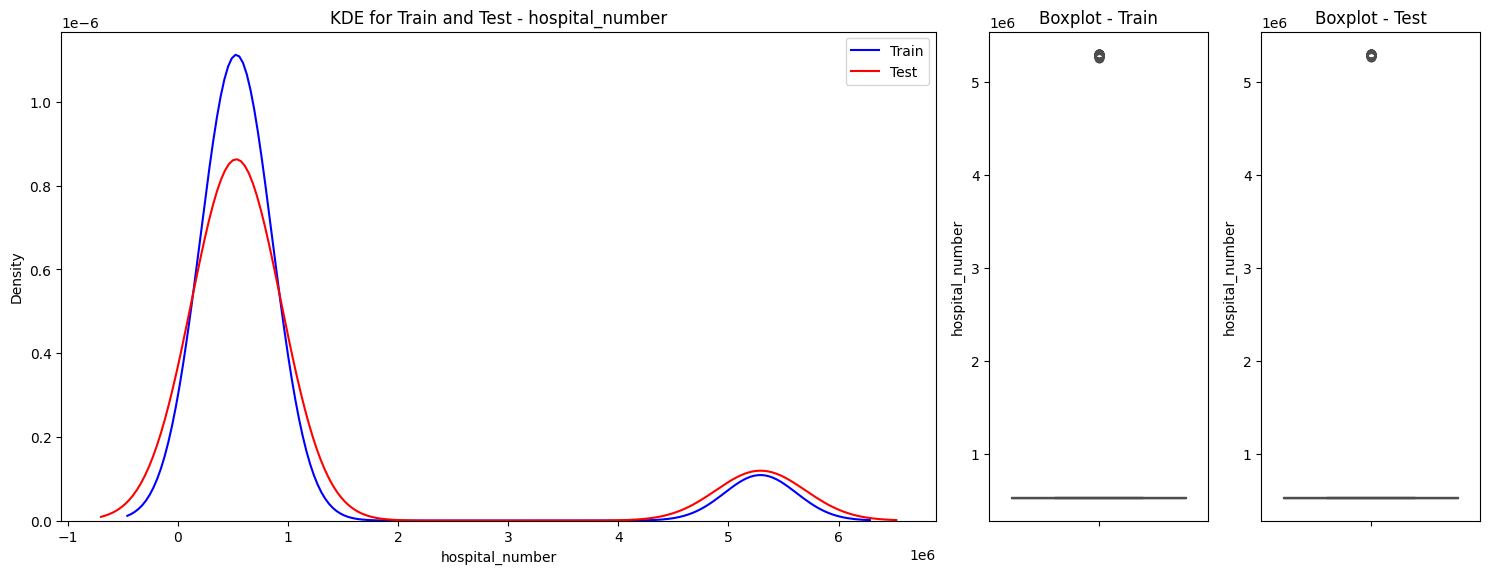

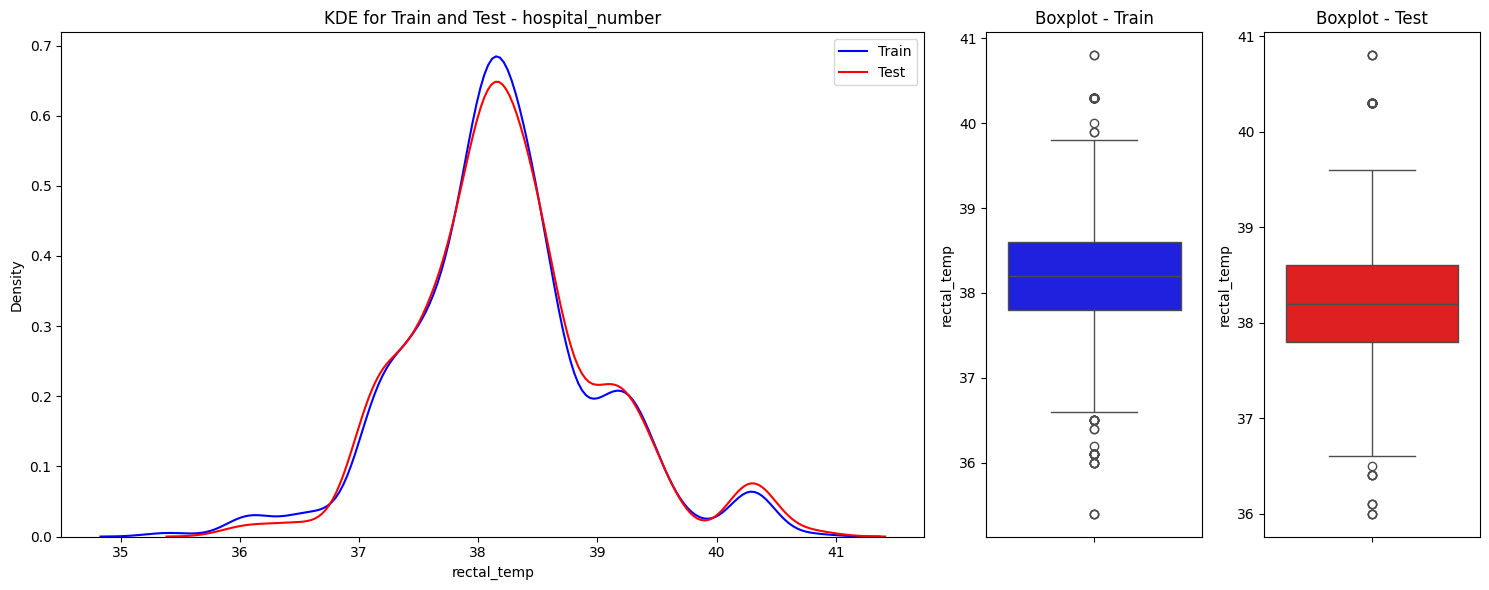

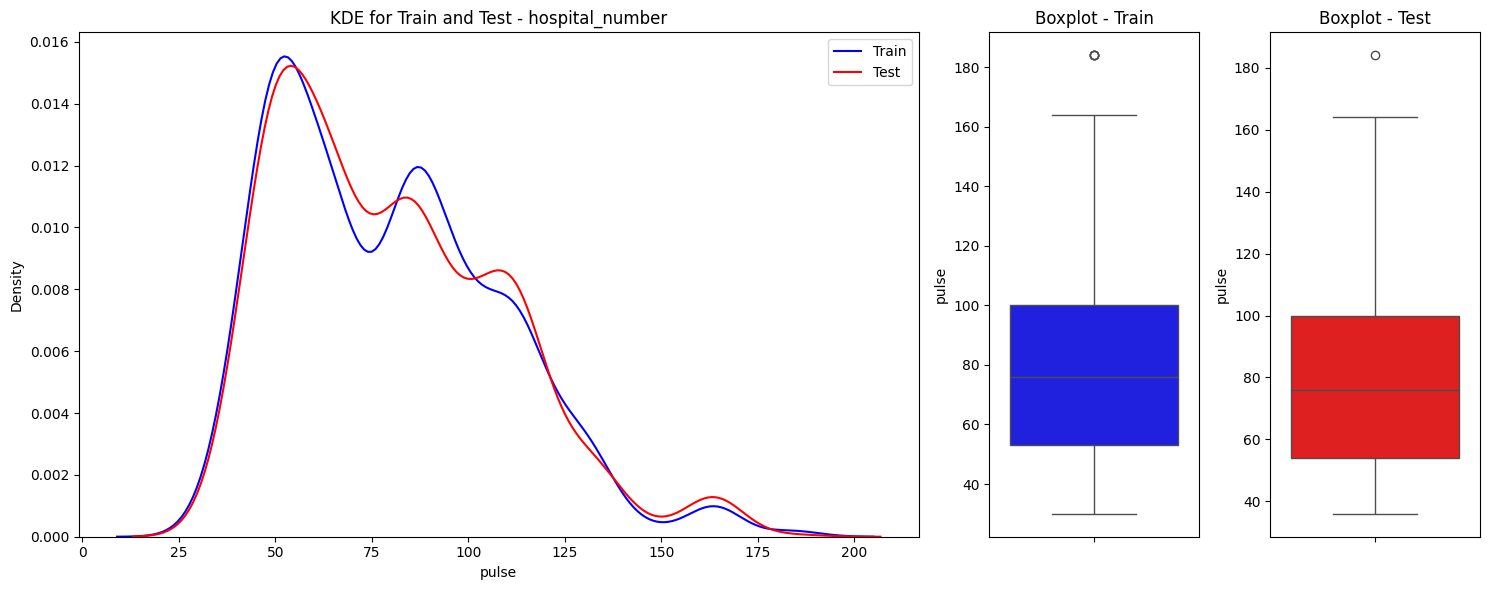

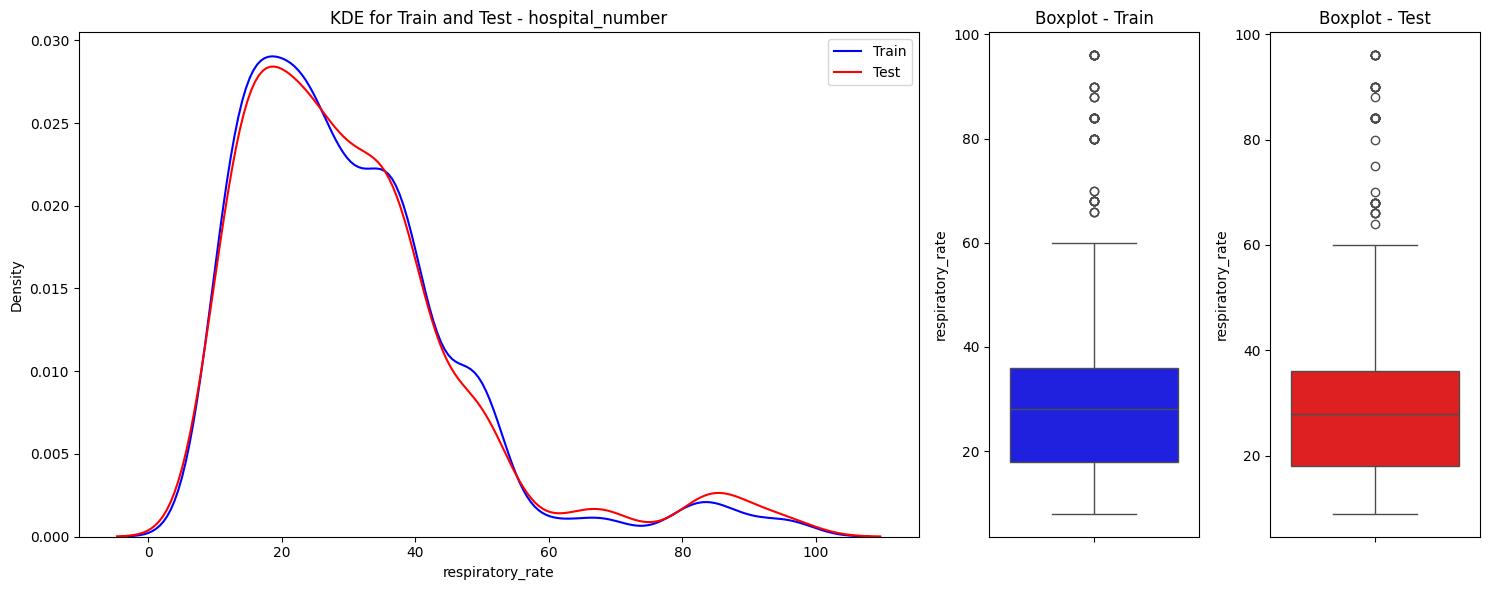

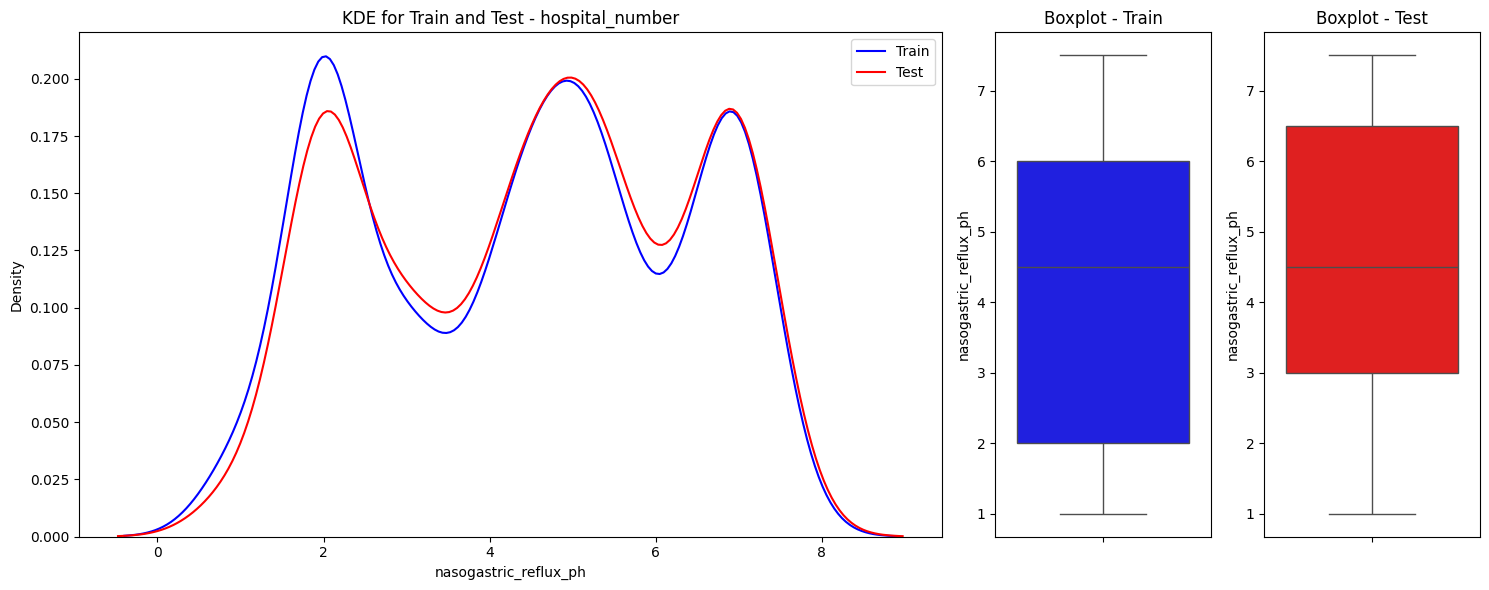

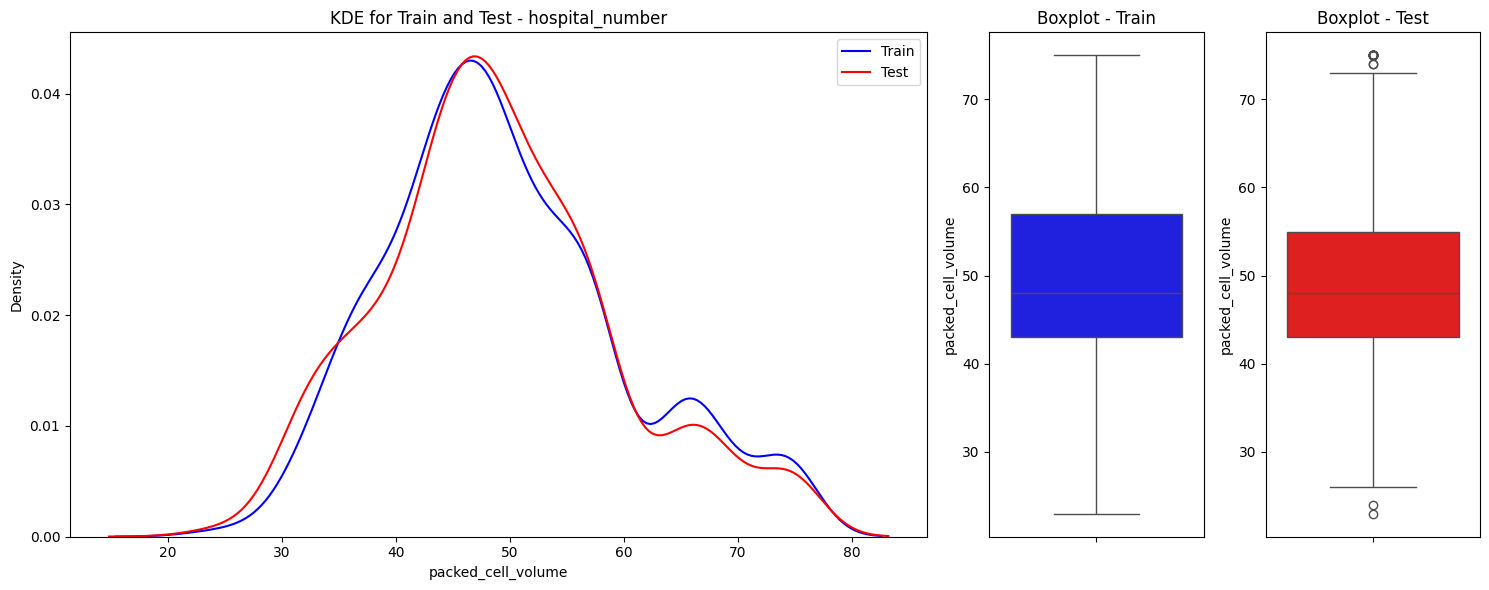

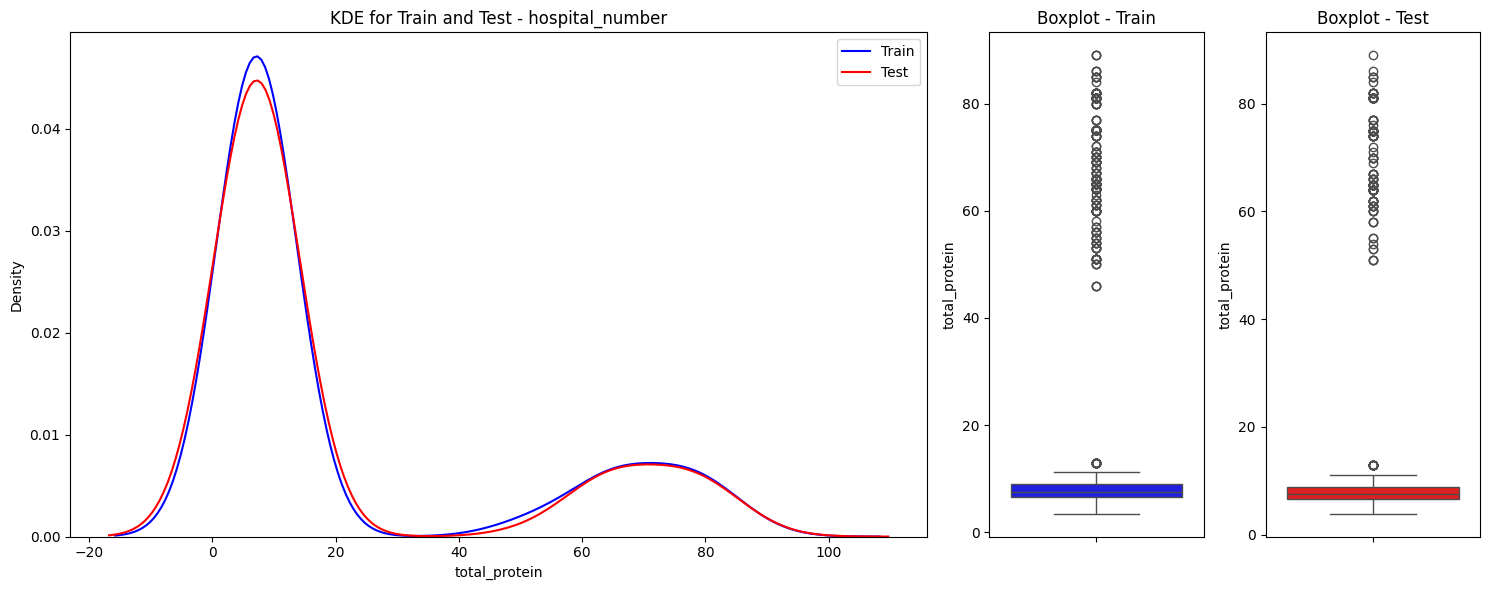

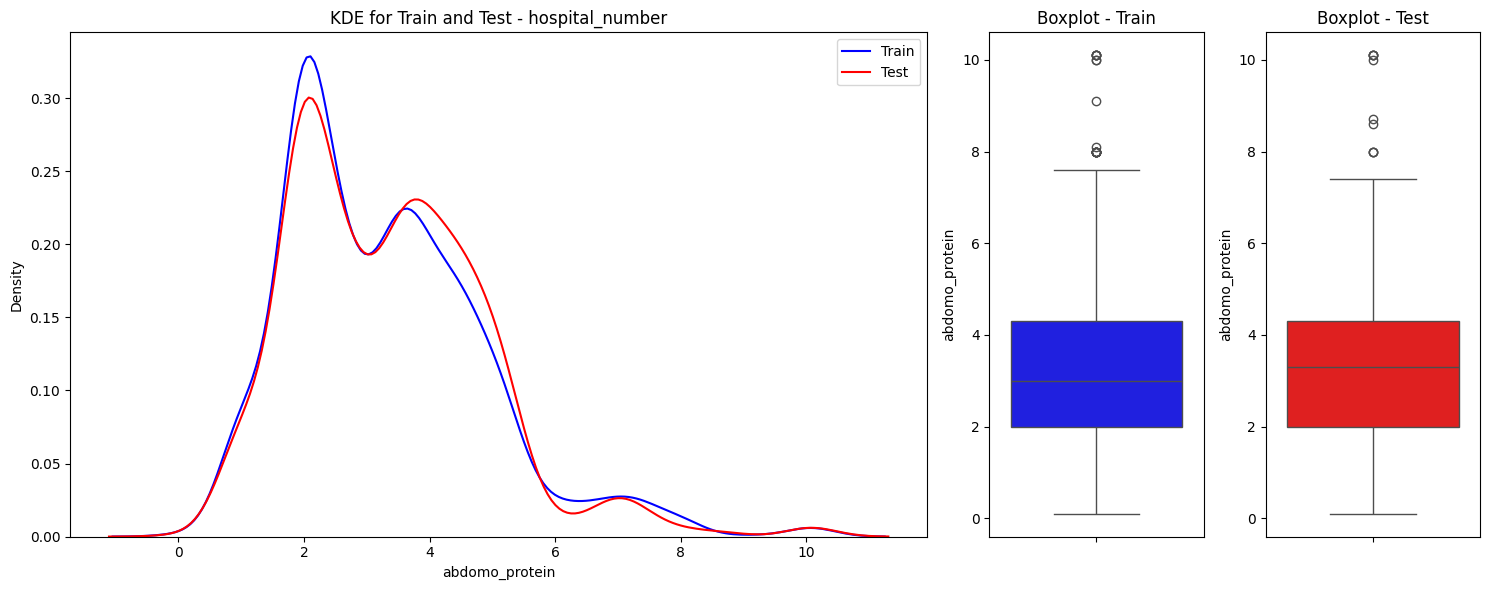

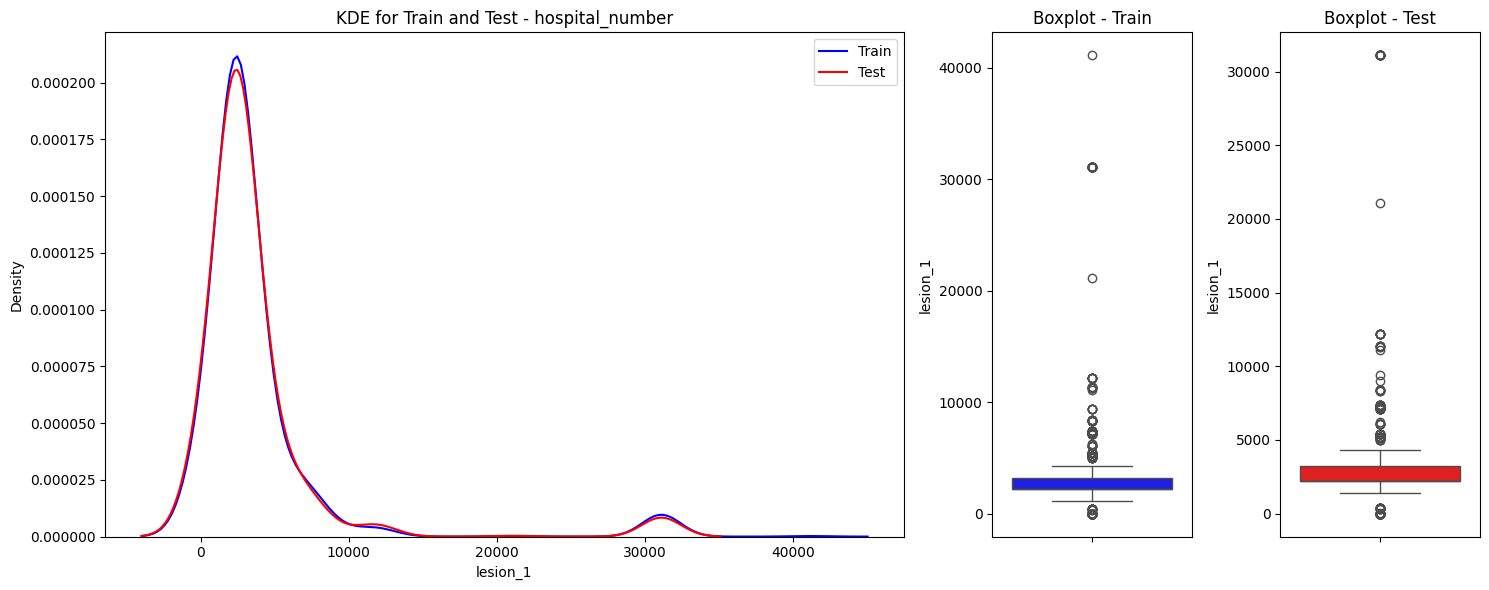

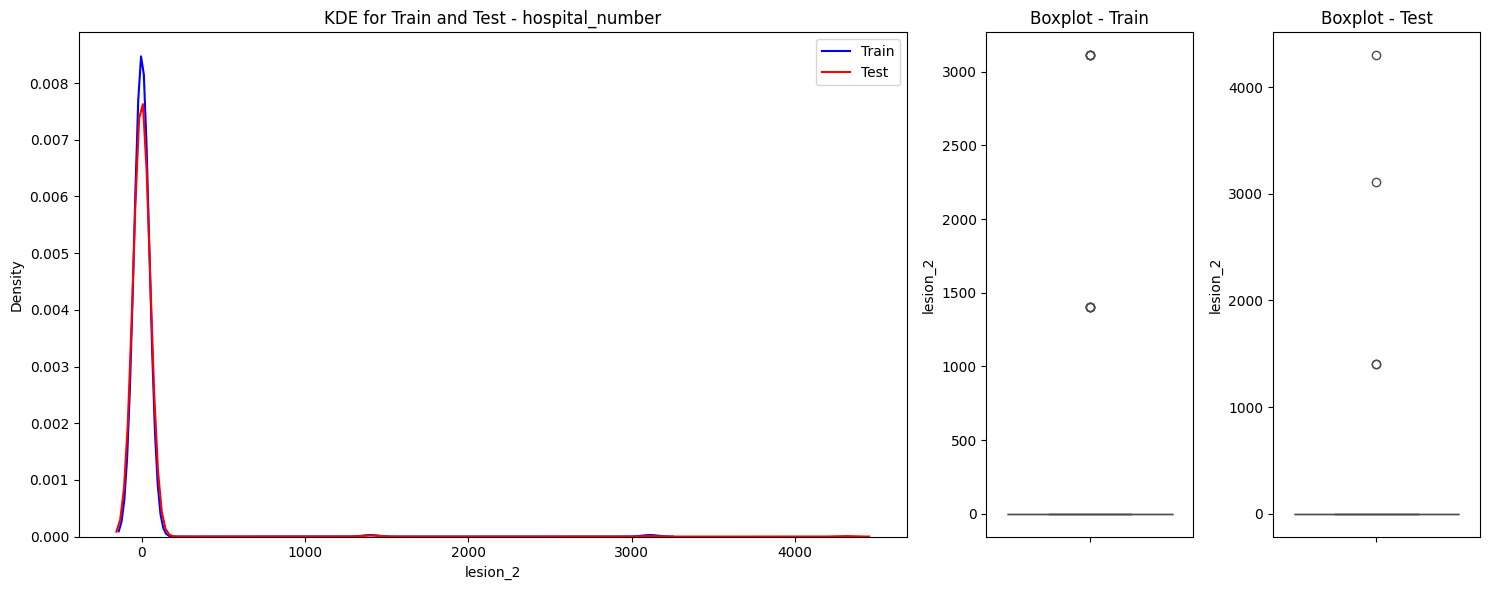

/tmp/ipykernel_5387/913908393.py:5: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



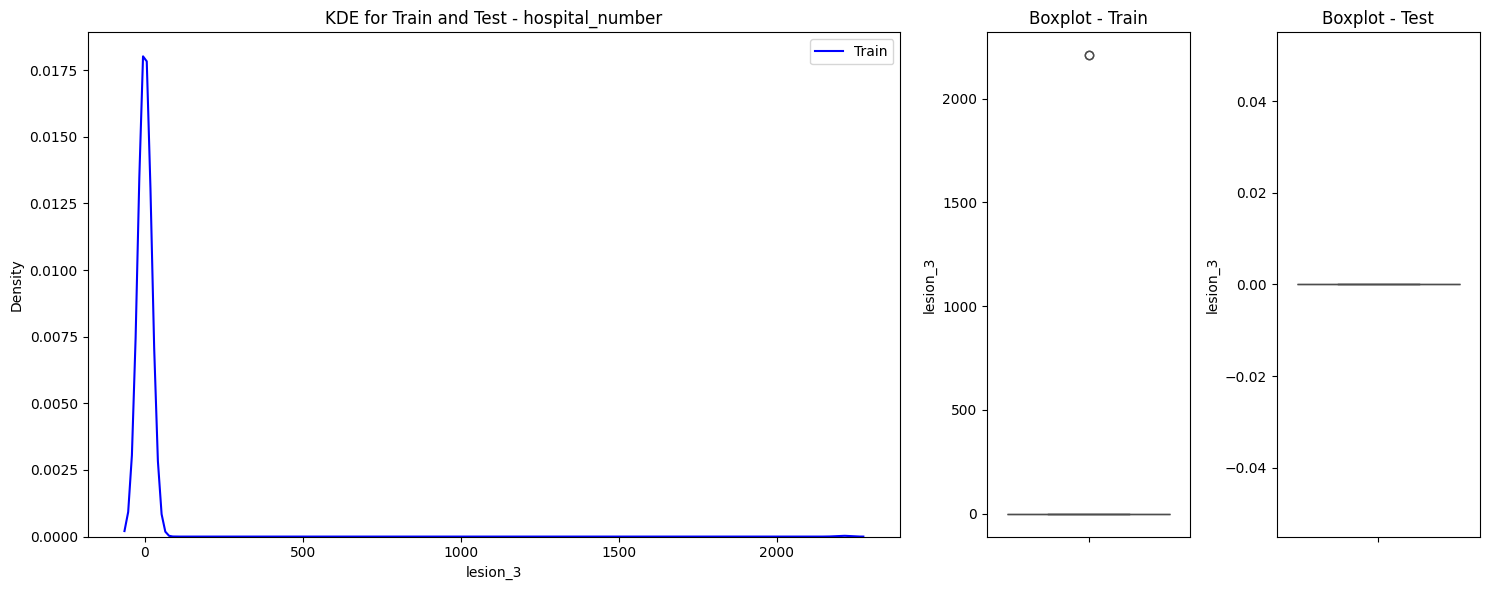

In [31]:
for feature in num_train:
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [4, 1, 1]})
    # plt.figure(figsize=(10, 5))
    sns.kdeplot(data=train, x=feature, label='Train', ax=axes[0], color="blue")
    sns.kdeplot(data=test, x=feature, label='Test', ax=axes[0], color="red")
    axes[0].set_title(f"KDE for Train and Test - {num_train[0]}")
    axes[0].legend()

    sns.boxplot(data=train, y=feature, ax=axes[1], color="blue")
    axes[1].set_title(f"Boxplot - Train")

    sns.boxplot(data=test, y=feature, ax=axes[2], color="red")
    axes[2].set_title(f"Boxplot - Test")

    plt.tight_layout()
    plt.show()

### Cat features

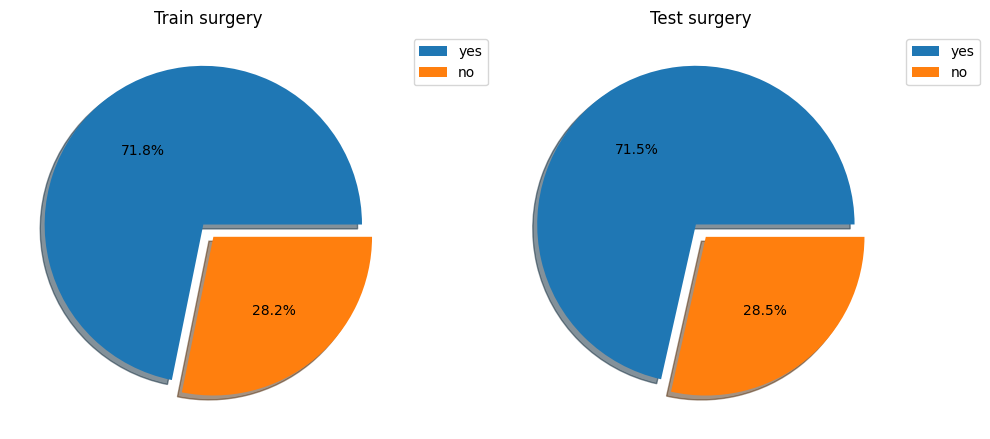

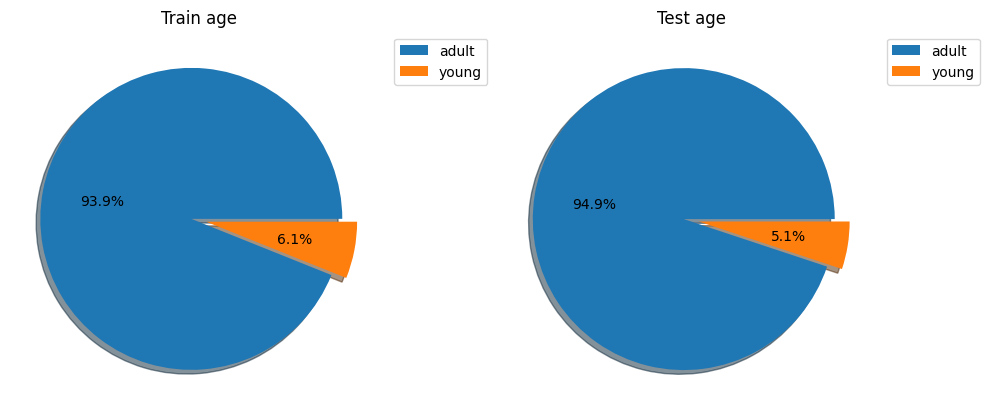

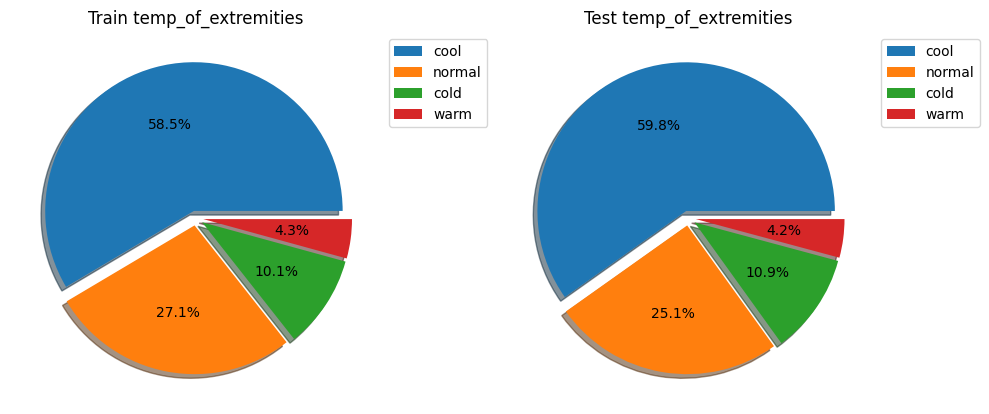

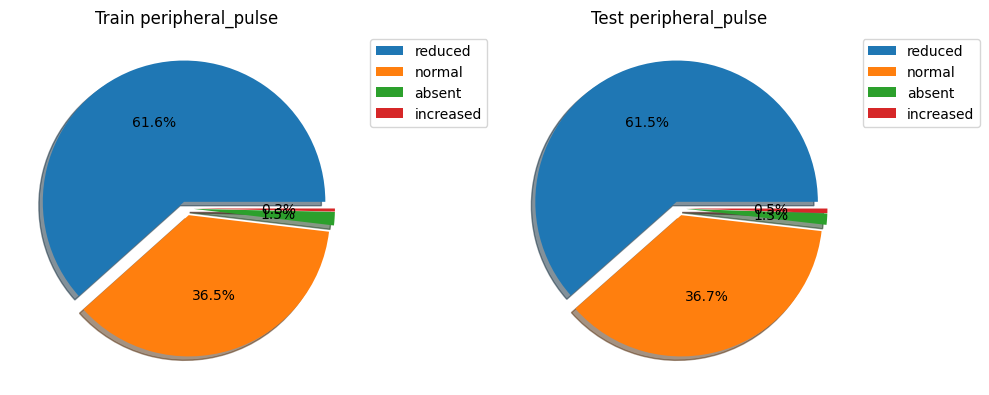

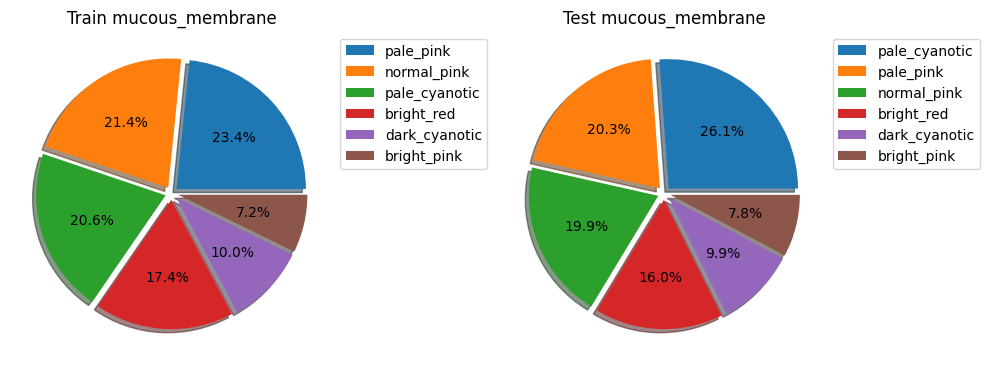

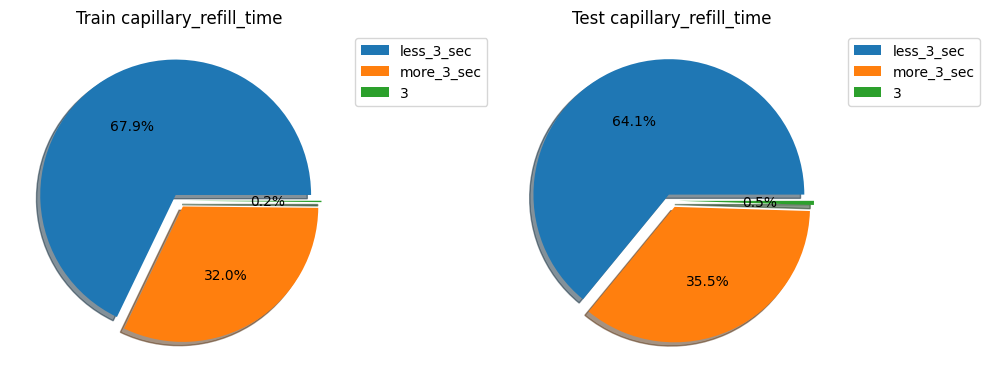

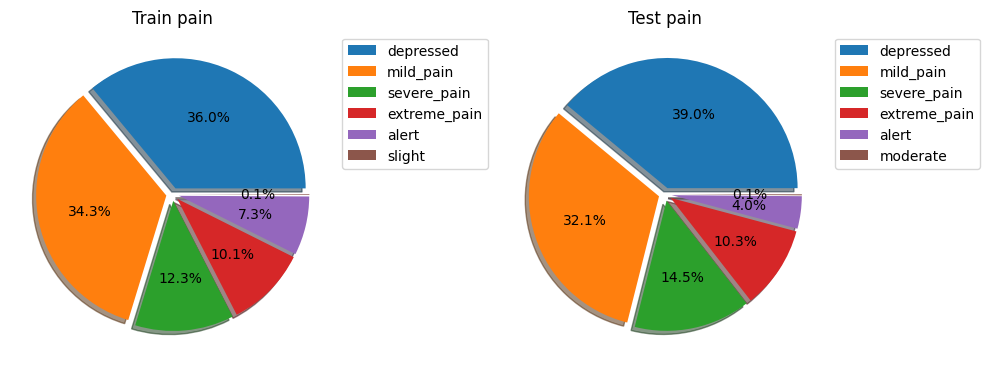

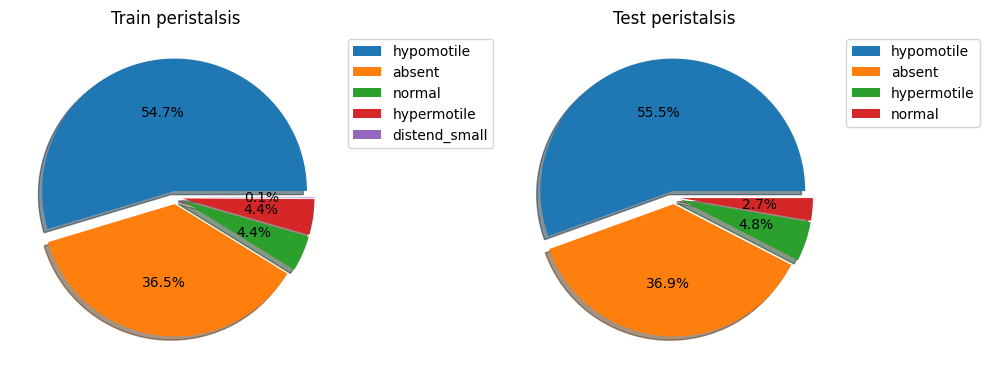

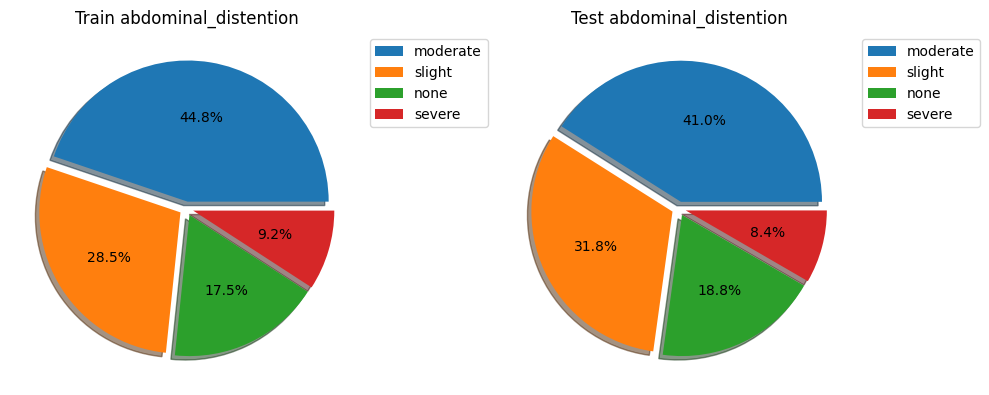

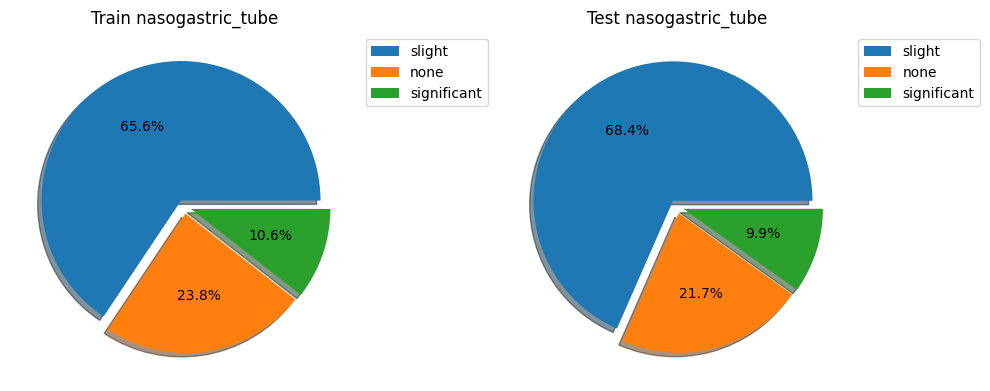

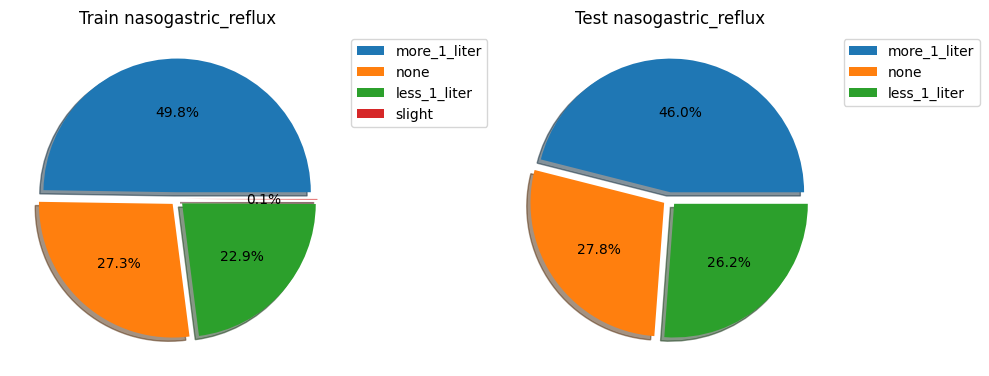

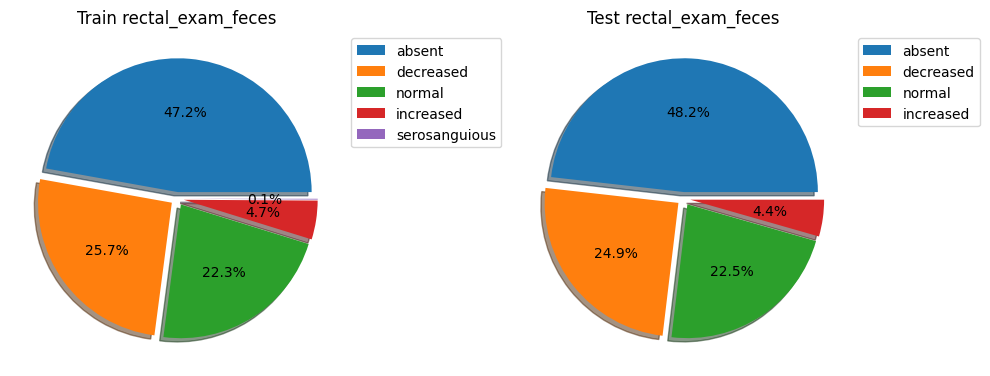

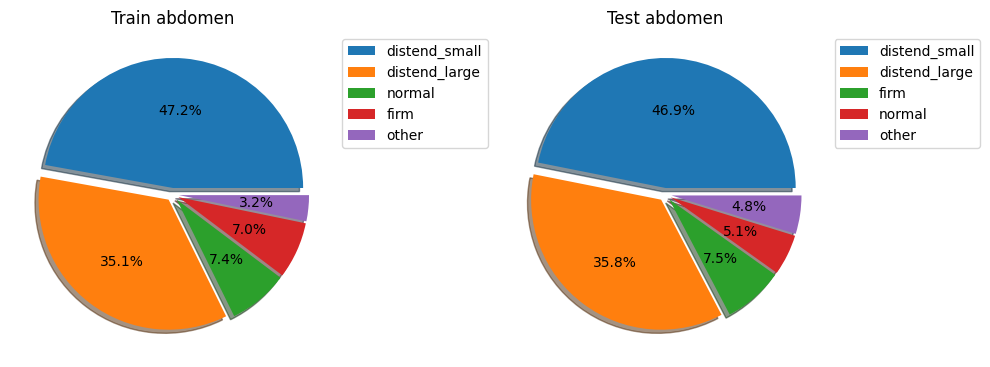

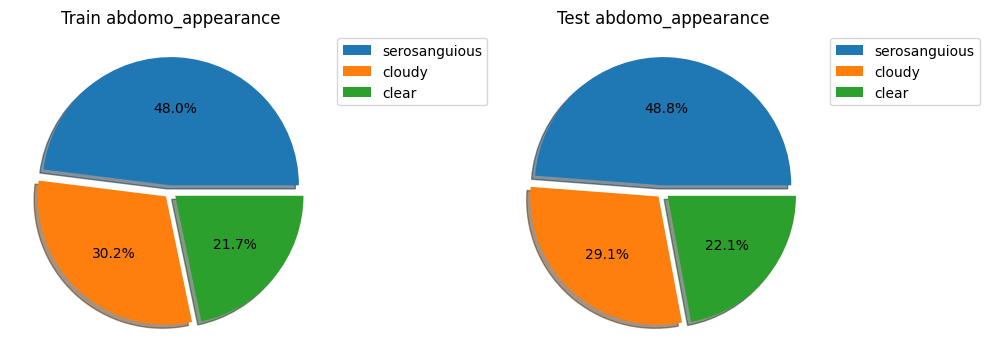

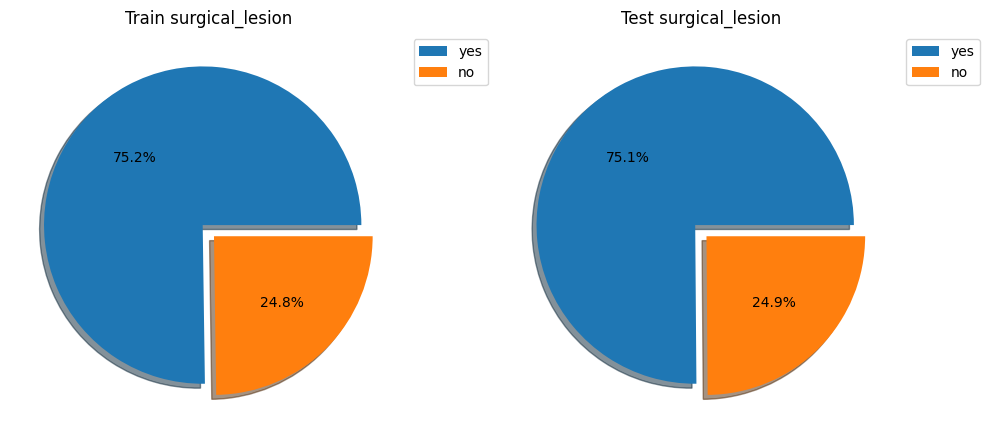

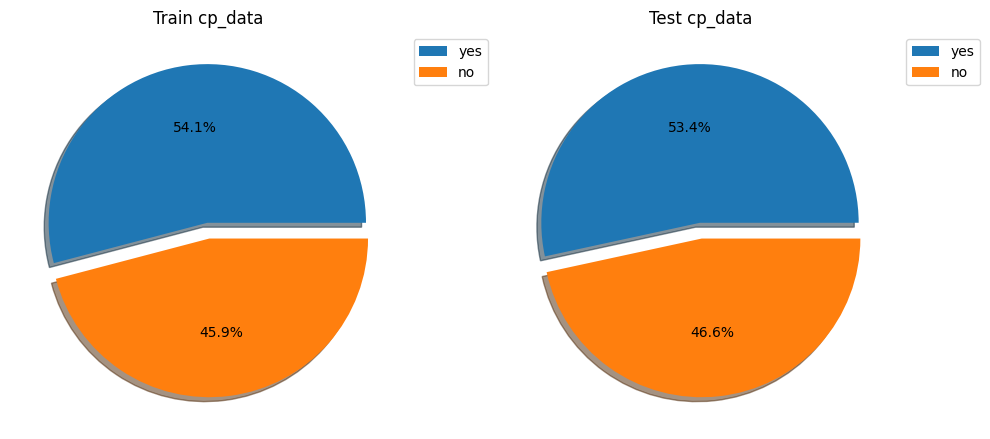

In [32]:
for feature in cat_test:
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))

    train_dist = train[feature].value_counts()
    test_dist = test[feature].value_counts()

    axes[0].pie(
        train_dist,
        shadow=True,
        autopct='%.1f%%',
        explode=[.05]*len(train_dist),
    )
    axes[0].legend(train_dist.index.tolist(), loc='upper left', bbox_to_anchor=(1, 1))
    axes[0].set_title(f'Train {feature}')

    axes[1].pie(
        test_dist,
        shadow=True,
        autopct='%.1f%%',
        explode=[.05]*len(test_dist),
    )
    axes[1].legend(test_dist.index.tolist(), loc='upper left', bbox_to_anchor=(1, 1))
    axes[1].set_title(f'Test {feature}')

    plt.tight_layout()
    plt.show()


Les distributions sont similaires donc il n'y a pas de data drift

### countplot cat features

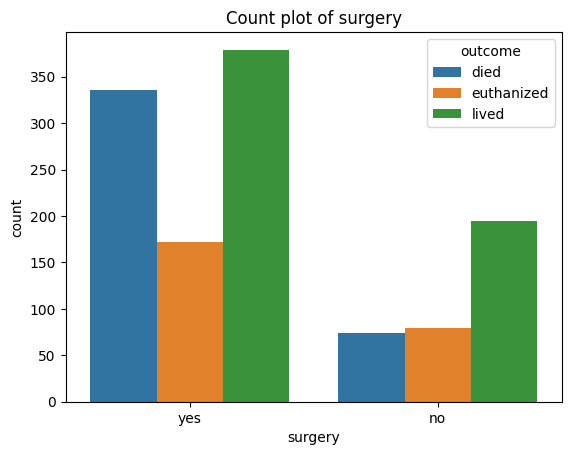

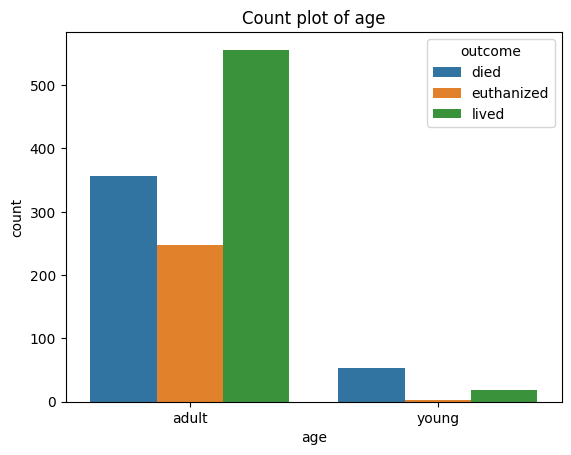

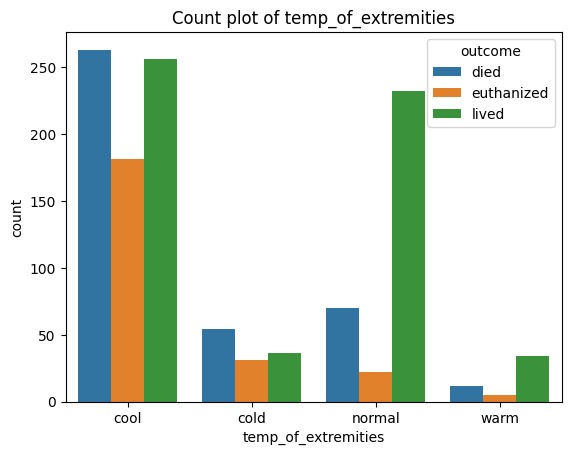

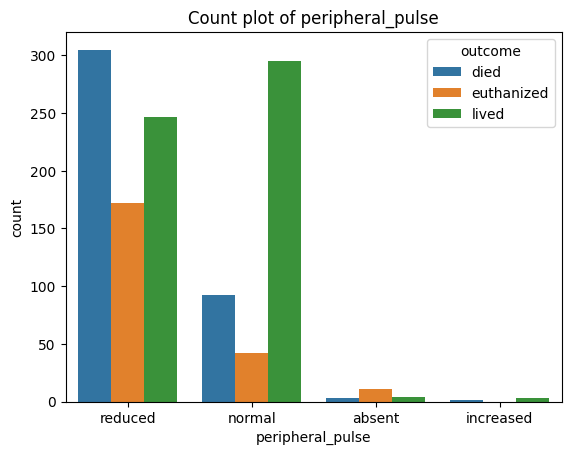

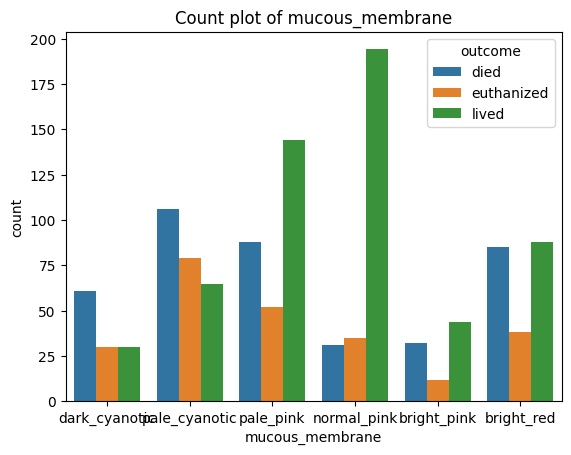

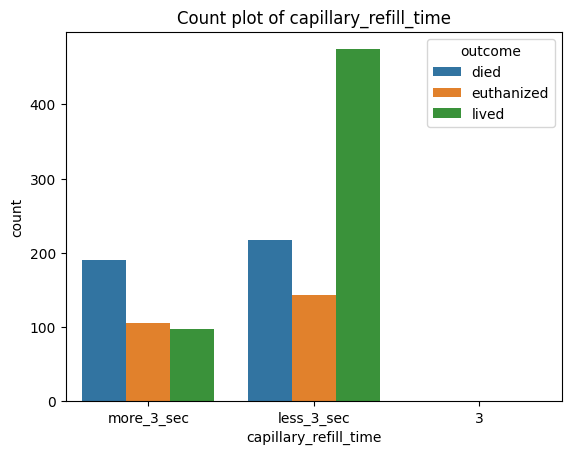

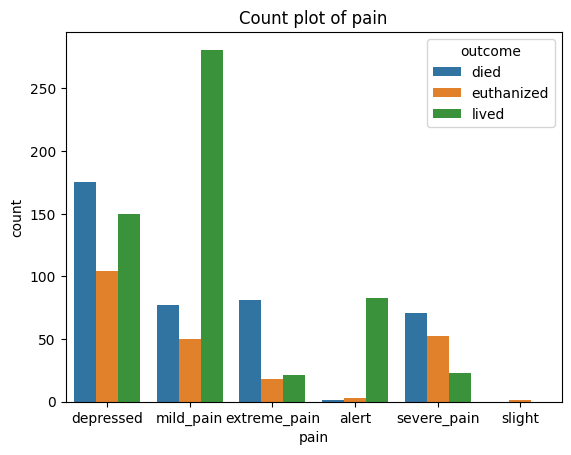

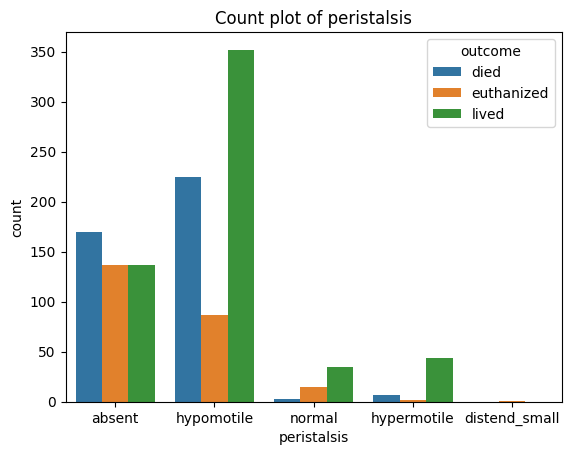

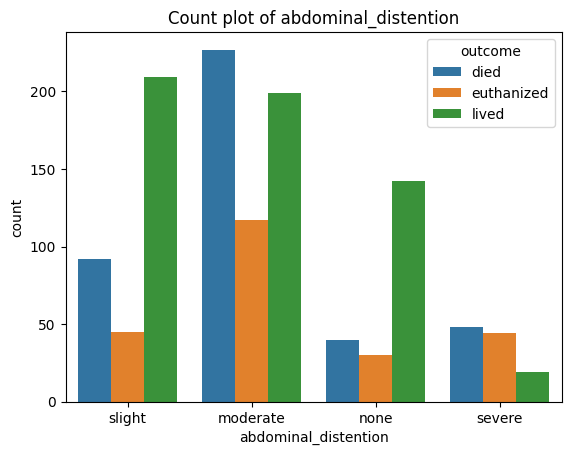

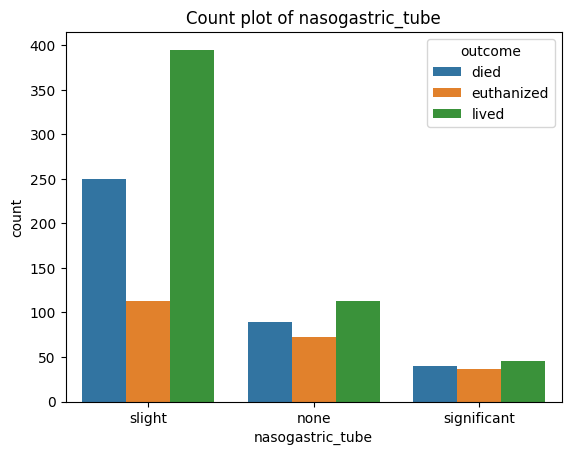

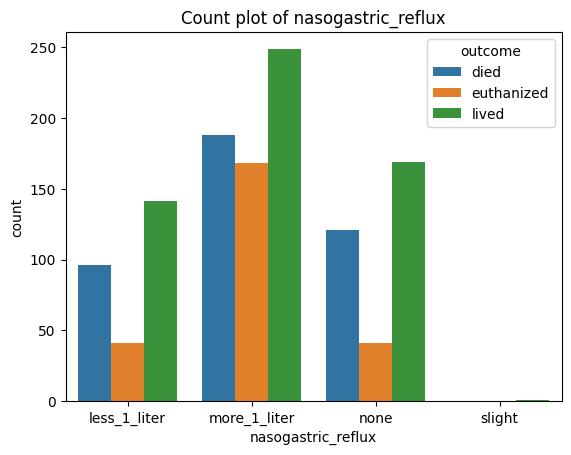

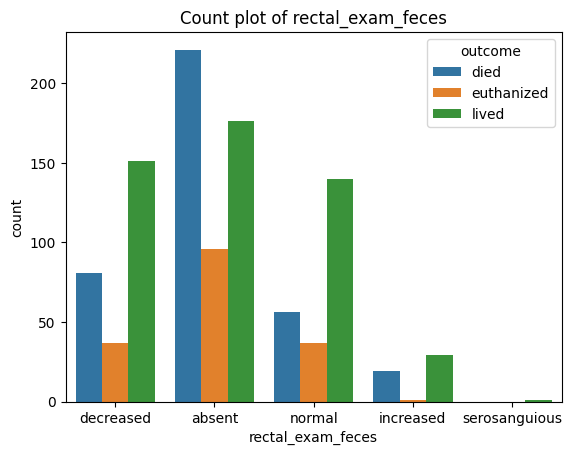

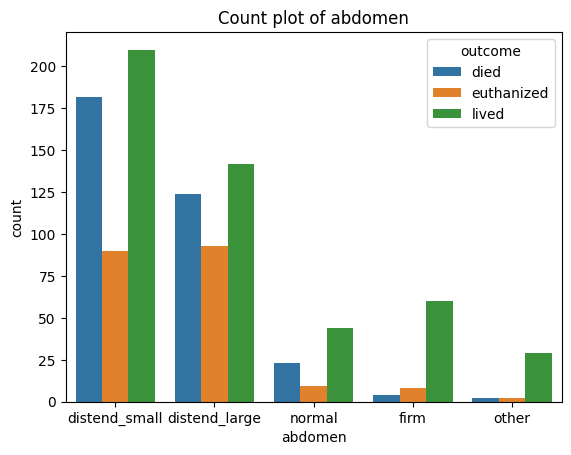

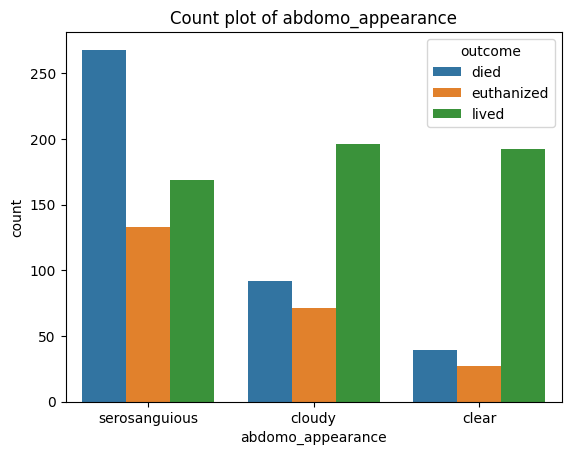

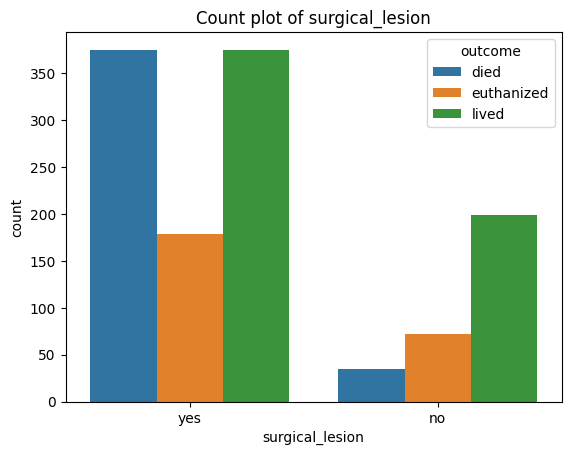

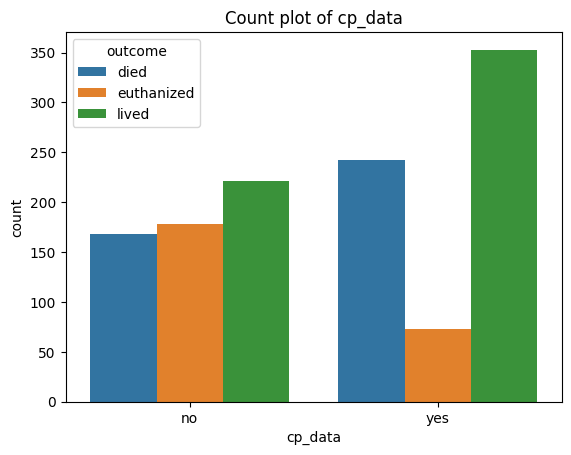

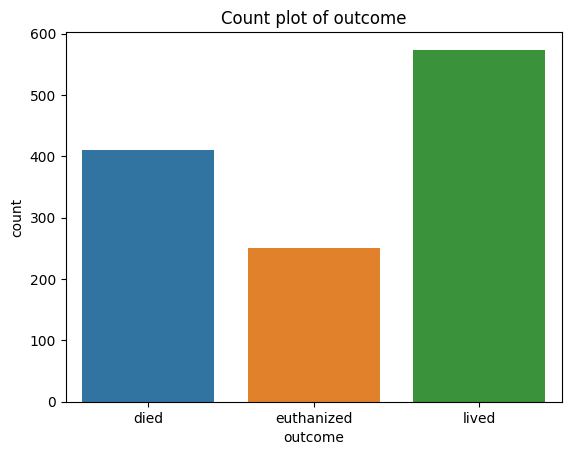

In [33]:
for feature in cat_train:
    plt.figure()
    sns.countplot(data=train, x=feature, hue="outcome")
    plt.title(f"Count plot of {feature}")
    plt.show()

### histplot kde num features

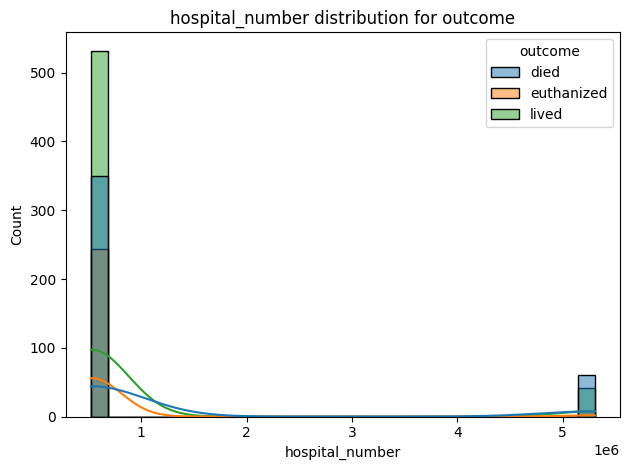

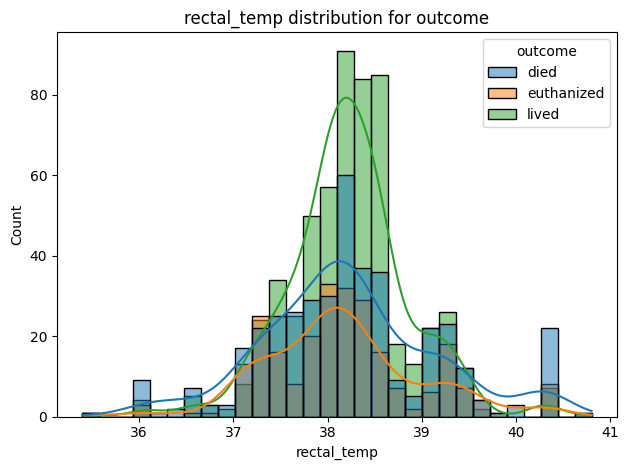

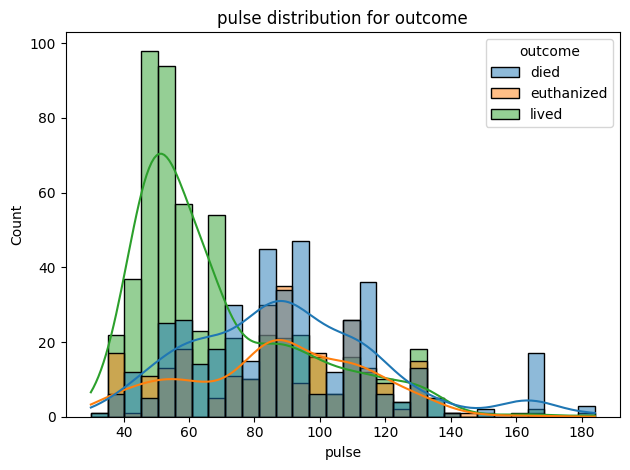

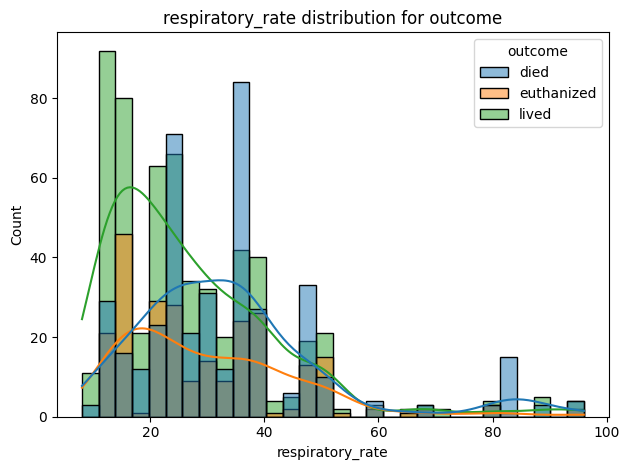

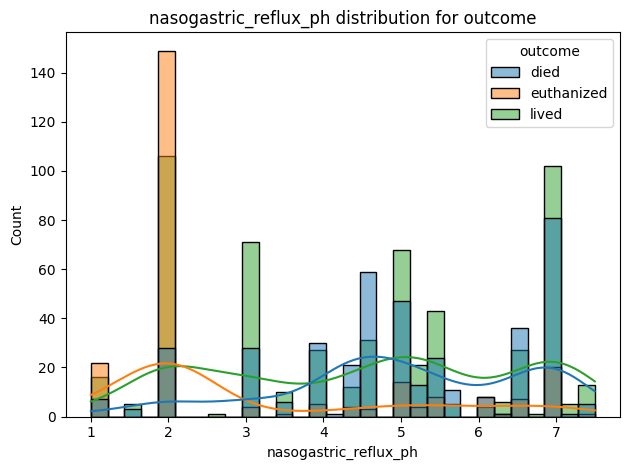

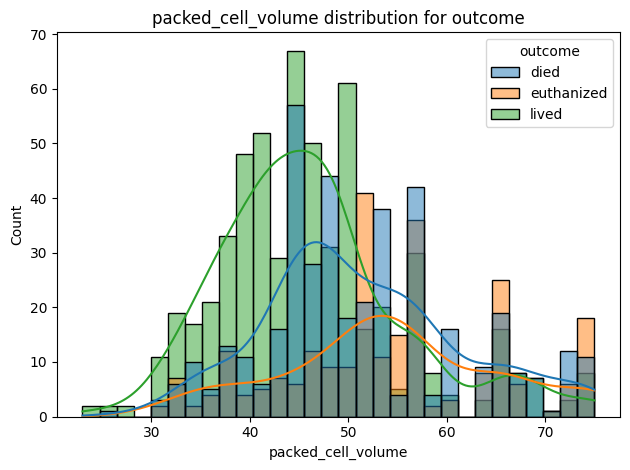

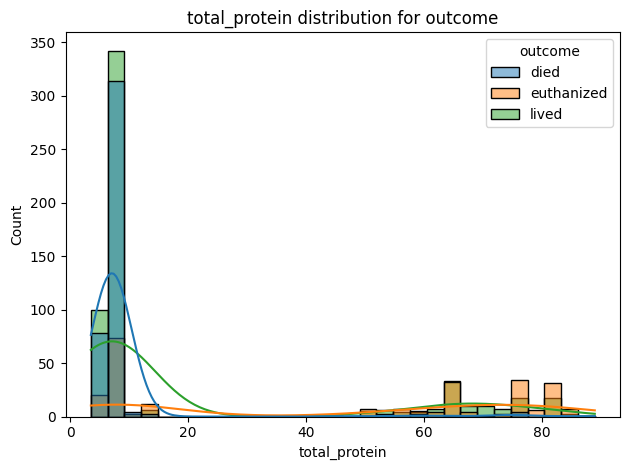

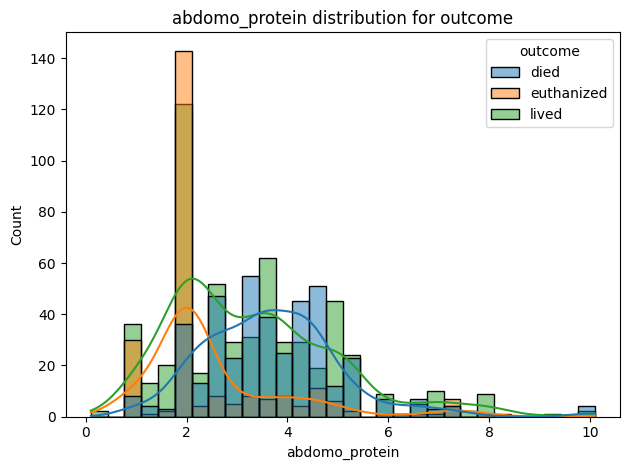

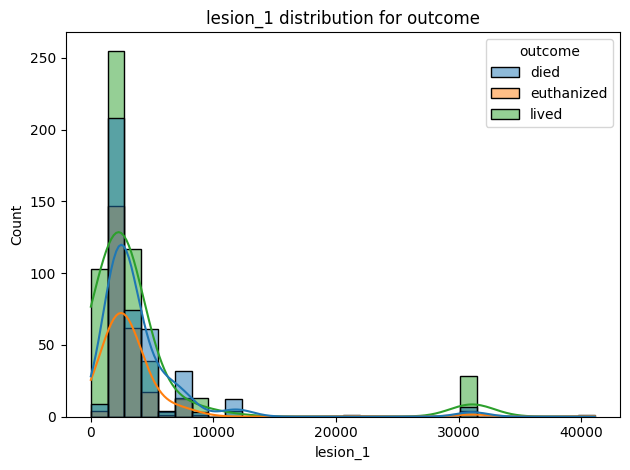

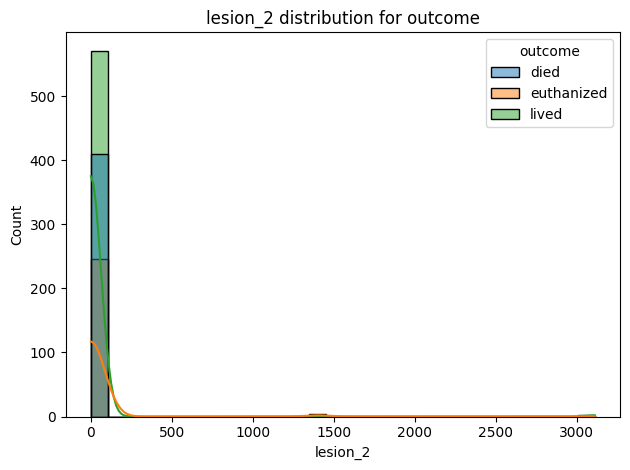

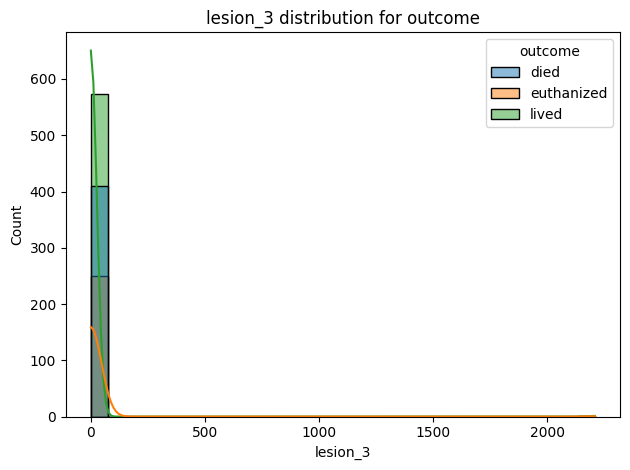

In [34]:
for feature in num_train:
    plt.figure()
    sns.histplot(data=train, x=feature, hue="outcome", kde=True, bins=30)
    plt.title(f"{feature} distribution for outcome")
    plt.tight_layout()
    plt.show()

## Correlation

## Corr matrix of num features

<Axes: >

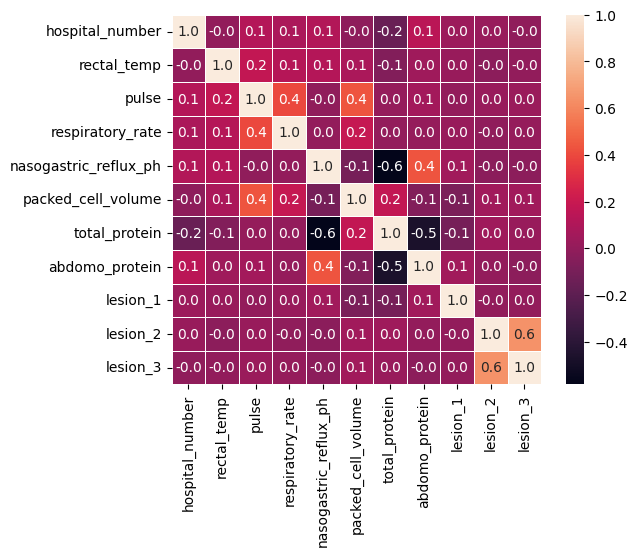

In [35]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), linewidths=0.5, square=True, annot=True, fmt=".1f")

In [36]:
from scipy import stats

In [37]:
categorical_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','lesion_2','surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data']

In [38]:
for col in categorical_cols:
    contingency_table = pd.crosstab(train[col], train['outcome'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)

    print(f"{col:<25}  |    ", "\033[32mPassed" if p < .05 else "\033[31mFailed", "\033[0m")

temp_of_extremities        |     Passed 
peripheral_pulse           |     Passed 
mucous_membrane            |     Passed 
capillary_refill_time      |     Passed 
pain                       |     Passed 
peristalsis                |     Passed 
abdominal_distention       |     Passed 
nasogastric_tube           |     Passed 
nasogastric_reflux         |     Passed 
rectal_exam_feces          |     Passed 
abdomen                    |     Passed 
abdomo_appearance          |     Passed 
lesion_2                   |     Passed 
surgery                    |     Passed 
age                        |     Passed 
surgical_lesion            |     Passed 
lesion_3                   |     Failed 
cp_data                    |     Passed 


In [39]:
train.drop('lesion_3', axis=1, inplace=True)

# Cleaning

## Duplicates

In [40]:
train.drop_duplicates(inplace=True)

## Missing data

voir pas que les données manquantes par colonne mais aussi les lignes avec le plus de données manquantes

In [41]:
train.isna().sum().sort_values(ascending=False) /len(train)

abdomen                  0.172470
rectal_exam_feces        0.153846
nasogastric_tube         0.064777
peripheral_pulse         0.048583
abdomo_appearance        0.038866
pain                     0.035628
temp_of_extremities      0.031579
abdominal_distention     0.018623
mucous_membrane          0.017004
nasogastric_reflux       0.017004
peristalsis              0.016194
capillary_refill_time    0.004858
lesion_2                 0.000000
lesion_1                 0.000000
surgical_lesion          0.000000
total_protein            0.000000
abdomo_protein           0.000000
cp_data                  0.000000
surgery                  0.000000
packed_cell_volume       0.000000
nasogastric_reflux_ph    0.000000
age                      0.000000
respiratory_rate         0.000000
pulse                    0.000000
rectal_temp              0.000000
hospital_number          0.000000
outcome                  0.000000
dtype: float64

rectal_exam_feces et abdomen ont le plus de valeurs manquantes. 

Les valeurs manquantes ne sont que dans des features catégorielles

In [42]:
train['abdomen'].value_counts(dropna=False)

abdomen
distend_small    482
distend_large    359
NaN              213
normal            76
firm              72
other             33
Name: count, dtype: int64

In [43]:
train['rectal_exam_feces'].value_counts(dropna=False)

rectal_exam_feces
absent           493
decreased        269
normal           233
NaN              190
increased         49
serosanguious      1
Name: count, dtype: int64

Nous allons dans un premier temps juste par ajouter la catégorie "missing"

In [44]:
# impute with another category
# train.fillna("missing", inplace=True)

In [45]:
cols_with_nan = train[train.columns[train.isna().any()]].columns.tolist()

In [46]:
# imputation with most frequent
for feature in cols_with_nan:
    mode_val = train[feature].mode()[0]
    train[feature] = train[feature].fillna(mode_val)

In [47]:
train.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
cp_data                  0
outcome                  0
dtype: int64

## Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [49]:
target_enc = OrdinalEncoder(categories=[['died', 'euthanized', 'lived']])
label_encoder = LabelEncoder()

In [50]:
train_encoded = train.copy()

In [51]:
train_encoded['outcome'] = target_enc.fit_transform(train[['outcome']])

In [52]:
categorical_vars = train_encoded.select_dtypes(include='object').columns.to_list()

In [53]:
for col in categorical_vars:
    train_encoded[col] = label_encoder.fit_transform(train[col])

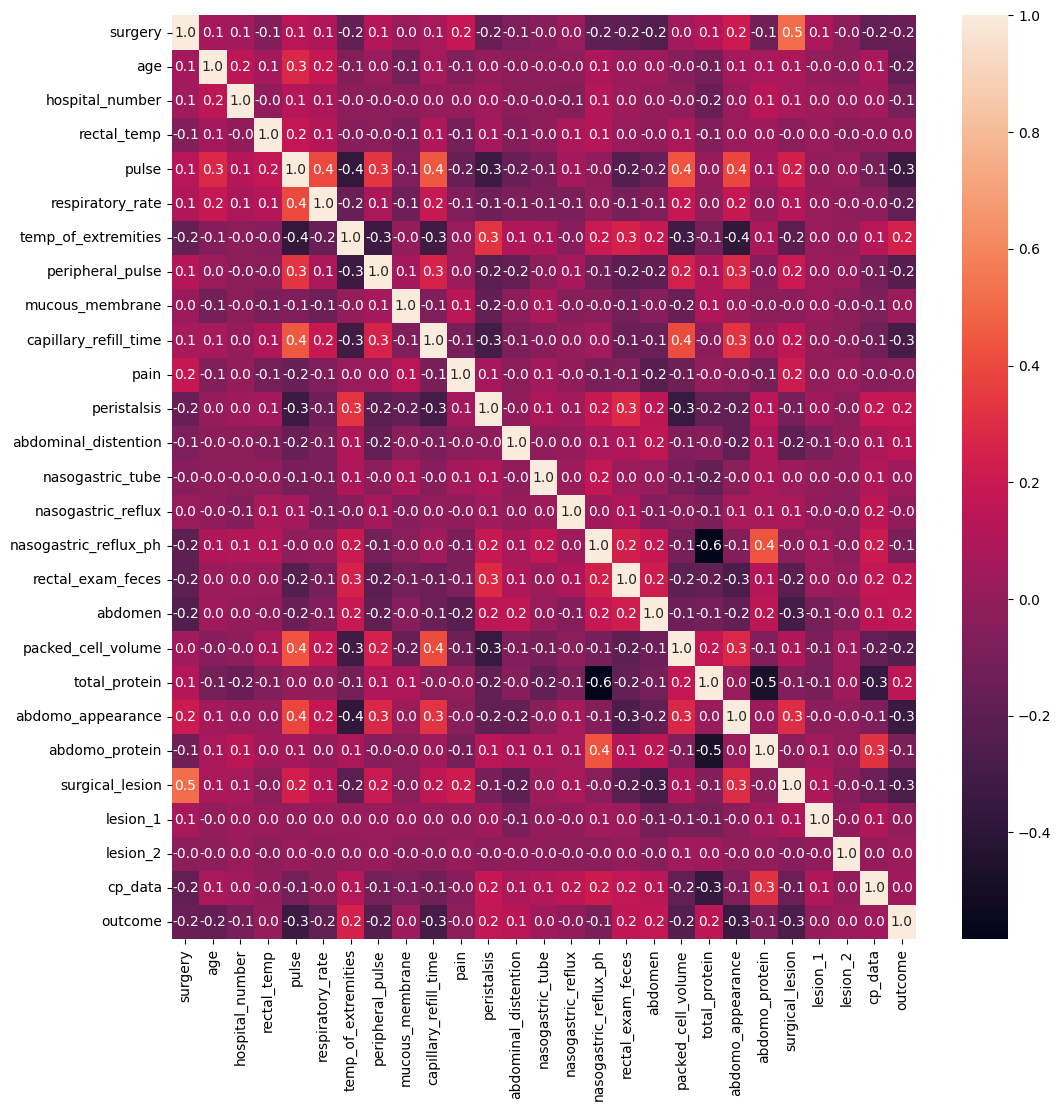

In [54]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_encoded.corr(), annot=True, fmt=".1f")
plt.show()

In [55]:
train_encoded.corr()['outcome'].sort_values(ascending=False)

outcome                  1.000000
temp_of_extremities      0.246979
peristalsis              0.169322
abdomen                  0.166447
rectal_exam_feces        0.161784
total_protein            0.155941
abdominal_distention     0.143276
cp_data                  0.041040
nasogastric_tube         0.039920
lesion_2                 0.032873
mucous_membrane          0.032337
rectal_temp              0.005517
lesion_1                 0.002687
nasogastric_reflux      -0.003006
pain                    -0.037363
nasogastric_reflux_ph   -0.084575
abdomo_protein          -0.087725
hospital_number         -0.104766
surgery                 -0.152502
age                     -0.176527
respiratory_rate        -0.185242
peripheral_pulse        -0.230031
packed_cell_volume      -0.235642
surgical_lesion         -0.262132
capillary_refill_time   -0.283691
pulse                   -0.330282
abdomo_appearance       -0.341097
Name: outcome, dtype: float64

In [56]:
selected_features = ['temp_of_extremities', 'peristalsis', 'abdomen', 'total_protein', 'rectal_exam_feces', 'abdominal_distention']

## Outliers

In [59]:
train.shape

(1235, 28)

In [63]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    df = df[df[feature] < upper_limit]
    # df = df[df[feature] > lower_limit]

    return df


In [64]:
new_df = train.copy()
for cat in num_train:
    new_df = remove_outliers(new_df, cat)

new_df.shape

(800, 28)

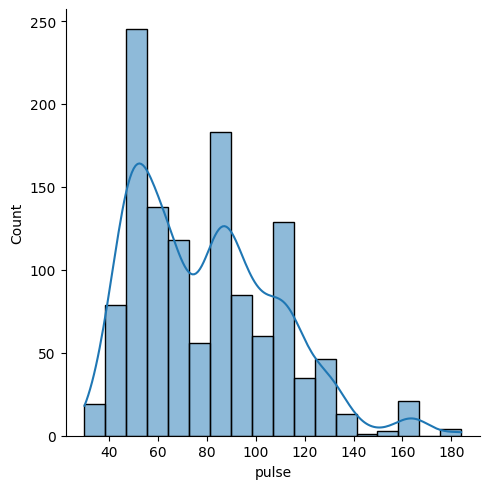

In [30]:
sns.displot(train['pulse'], kde=True)

<Axes: ylabel='pulse'>

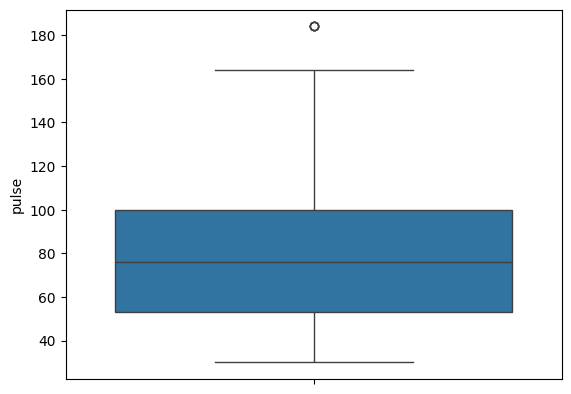

In [31]:
sns.boxplot(train['pulse'])

In [32]:
percentile25 = train['pulse'].quantile(0.25)
percentile75 = train['pulse'].quantile(0.75)

In [33]:
iqr = percentile75 - percentile25

In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
upper_limit, lower_limit

(170.5, -17.5)

In [36]:
train[train['pulse'] > upper_limit]

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
338      yes  adult           529685         38.4  184.0              58.0   
420      yes  young           529340         38.3  184.0              30.0   
967      yes  adult           530526         38.5  184.0              84.0   
1029     yes  young           529172         37.6  184.0              60.0   

     temp_of_extremities peripheral_pulse mucous_membrane  \
338               normal           normal     bright_pink   
420                 cool          reduced       pale_pink   
967                 cold          reduced   dark_cyanotic   
1029              normal          reduced     bright_pink   

     capillary_refill_time  ... packed_cell_volume total_protein  \
338             less_3_sec  ...               42.0           7.5   
420             less_3_sec  ...               48.0           6.1   
967             more_3_sec  ...               60.0           6.5   
1029            less_3_sec  ...               74.0           6.8   

     abdomo_appearance abdomo_protein surgical_lesion  lesion_1 lesion_2  \
338             cloudy            1.7             yes      2124        0   
420      serosanguious            4.5             yes      2205        0   
967      serosanguious            3.4             yes      7111        0   
1029            cloudy            2.6             yes      8400        0   

     lesion_3  cp_data  outcome  
338         0      yes    lived  
420         0      yes     died  
967         0      yes     died  
1029        0      yes     died  

[4 rows x 28 columns]

In [37]:
train[train['pulse'] < lower_limit]

Empty DataFrame
Columns: [surgery, age, hospital_number, rectal_temp, pulse, respiratory_rate, temp_of_extremities, peripheral_pulse, mucous_membrane, capillary_refill_time, pain, peristalsis, abdominal_distention, nasogastric_tube, nasogastric_reflux, nasogastric_reflux_ph, rectal_exam_feces, abdomen, packed_cell_volume, total_protein, abdomo_appearance, abdomo_protein, surgical_lesion, lesion_1, lesion_2, lesion_3, cp_data, outcome]
Index: []

[0 rows x 28 columns]

In [38]:
new_train = train[train['pulse'] < upper_limit]

<Axes: ylabel='pulse'>

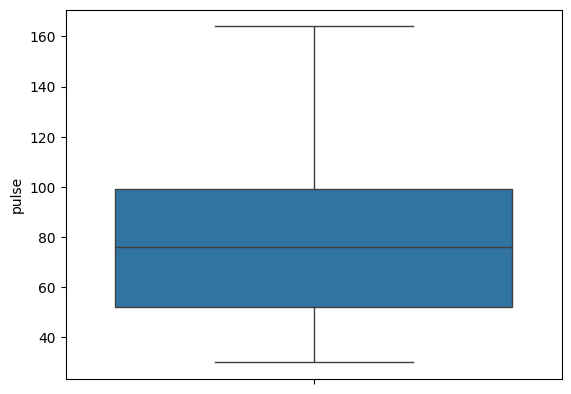

In [39]:
sns.boxplot(new_train['pulse'])

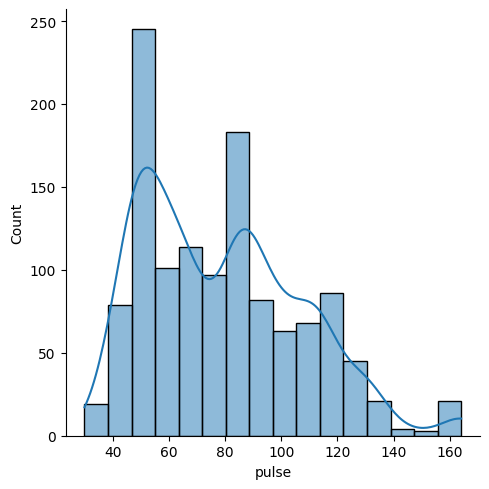

In [40]:
sns.displot(new_train['pulse'], kde=True)

In [41]:
new_train_cap = train.copy()
new_train_cap['pulse'] = np.where(
    new_train_cap['pulse'] > upper_limit,
    upper_limit,
    np.where(
        new_train_cap['pulse'] < lower_limit,
        lower_limit,
        new_train_cap['pulse']
    )
)

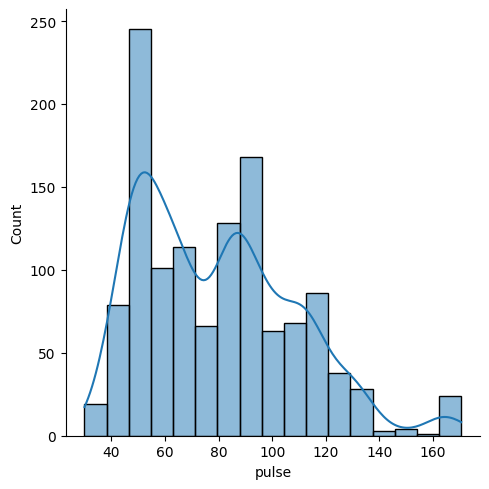

In [42]:
sns.displot(new_train_cap['pulse'], kde=True)

<Axes: ylabel='pulse'>

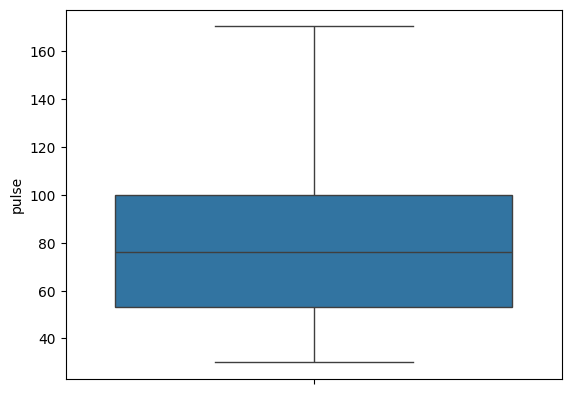

In [43]:
sns.boxplot(new_train_cap['pulse'])

In [44]:
num_train

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [45]:
num_train.remove('hospital_number')
num_train.remove('lesion_1')
num_train.remove('lesion_2')
num_train.remove('lesion_3')

In [46]:
num_train

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein']

In [73]:
def plot_num_features(df, columns):
    for feature in columns:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        sns.histplot(data=df, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
        sns.boxplot(df[feature], ax=axes[1])

        plt.show()

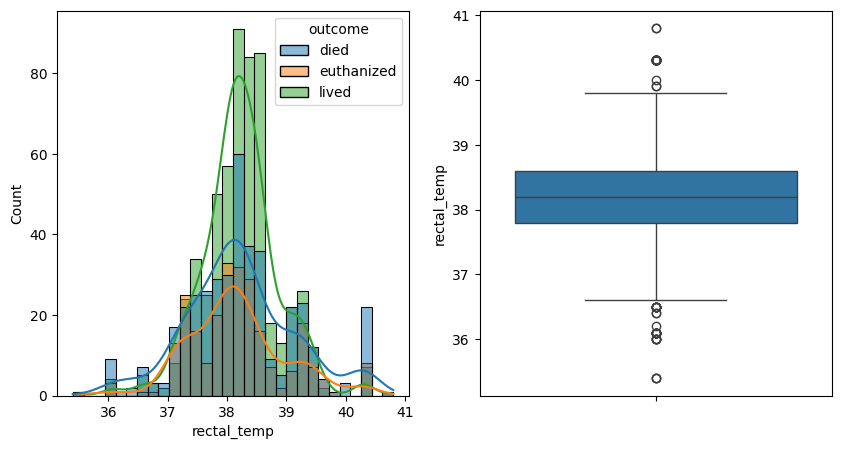

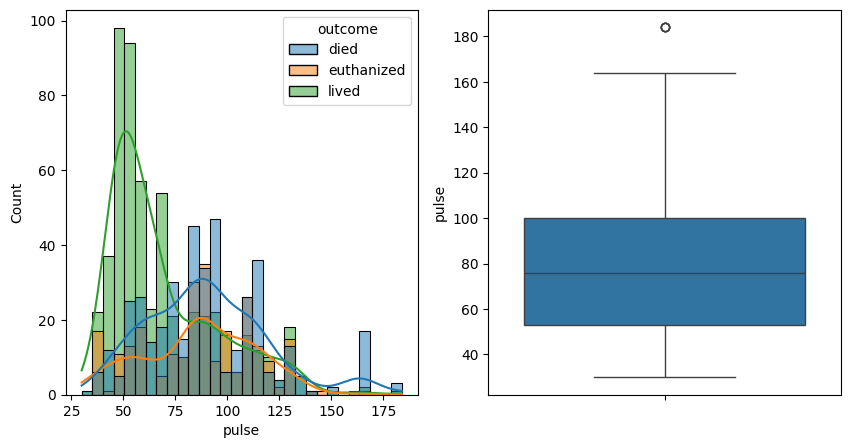

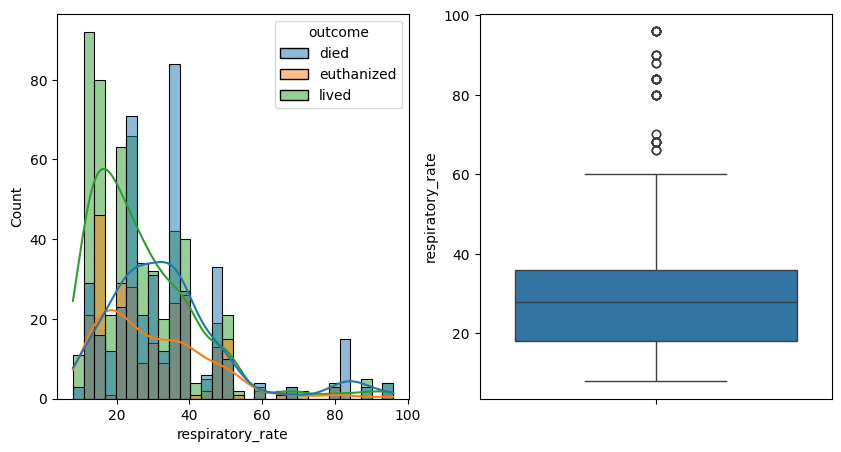

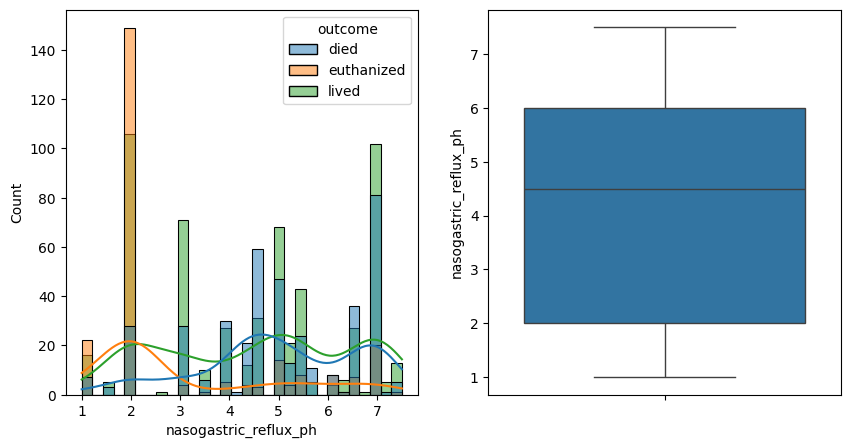

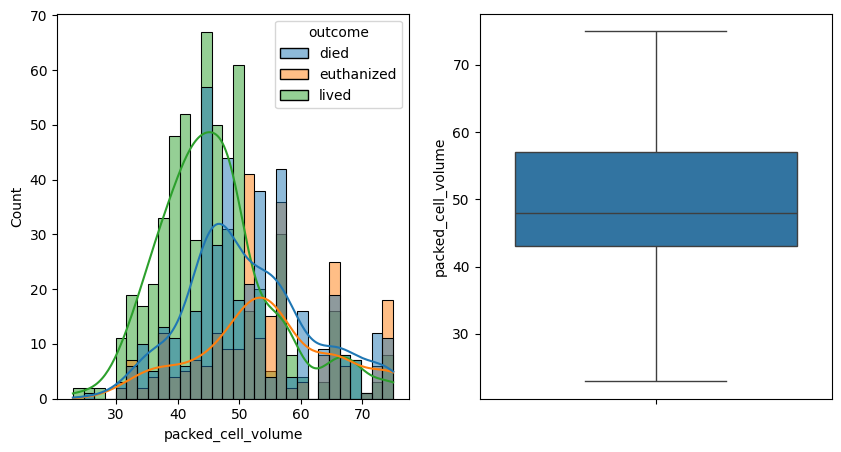

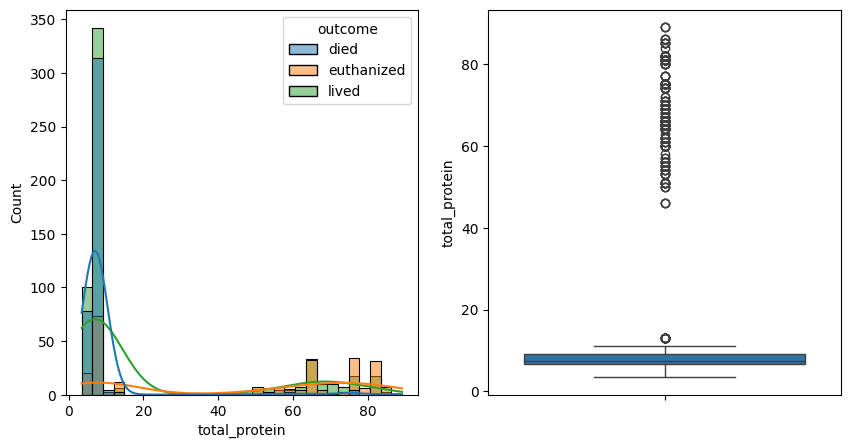

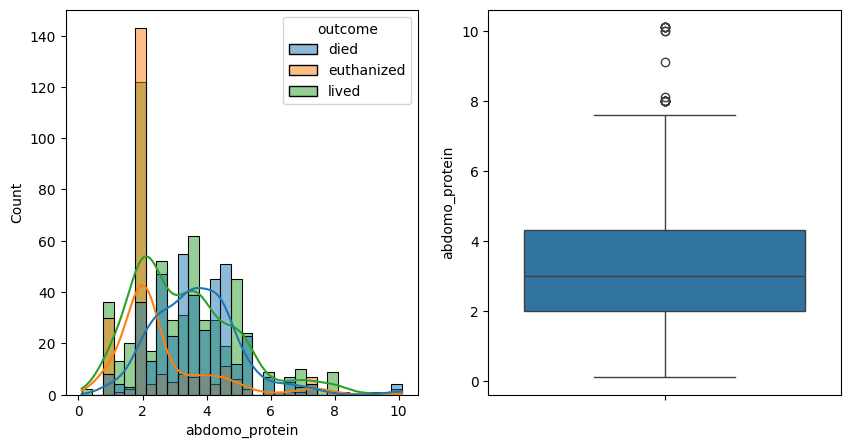

In [55]:
for feature in num_train:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data=train, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
    sns.boxplot(train[feature], ax=axes[1])

    plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

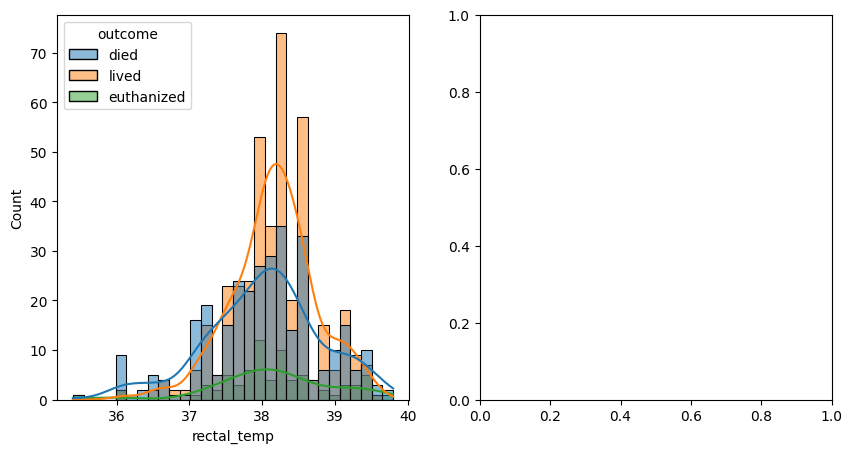

In [84]:
for feature in num_train:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data=new_df, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
    sns.boxplot(new_df[feature], ax=axes[1])

    plt.show()

## Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [70]:
minmax_scaler = MinMaxScaler()
normalized_train = train.copy()

for cat in num_train:
    normalized_train[[cat]] = minmax_scaler.fit_transform(normalized_train[[cat]])

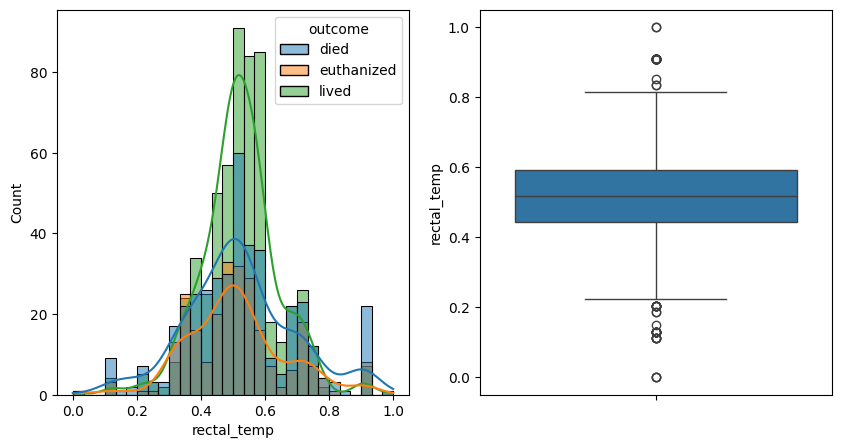

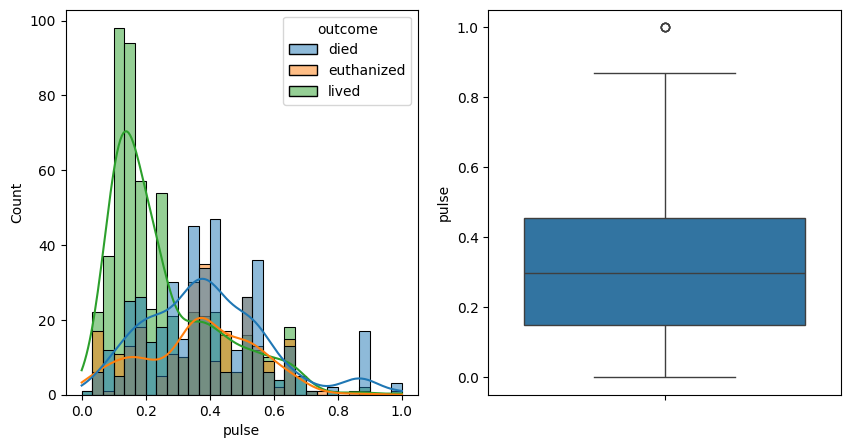

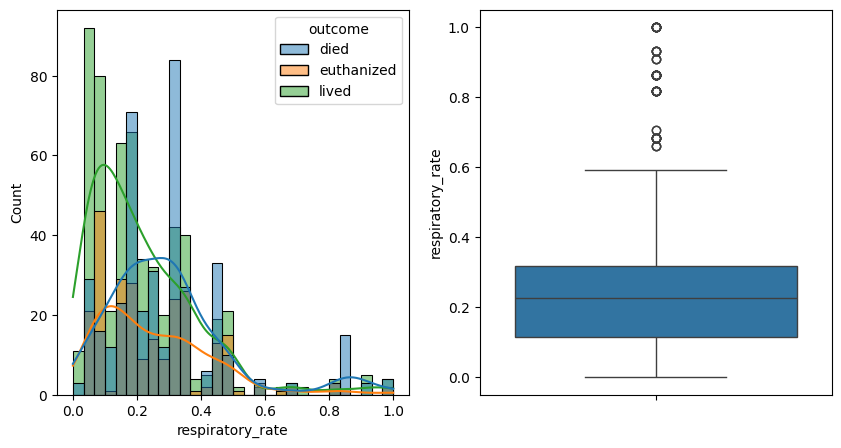

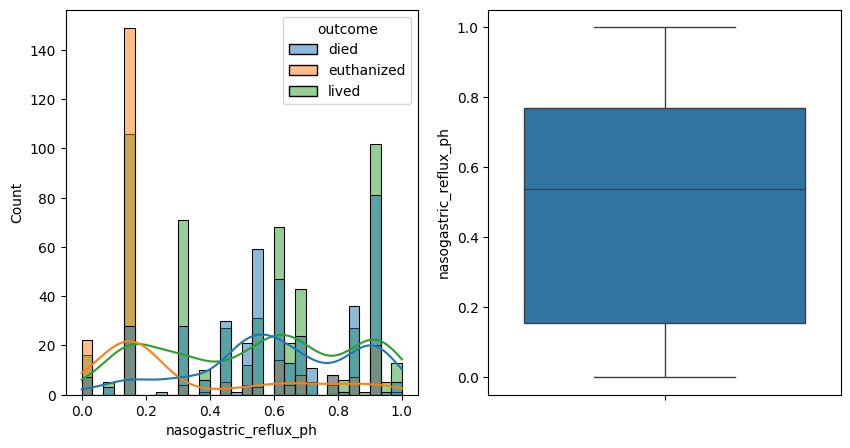

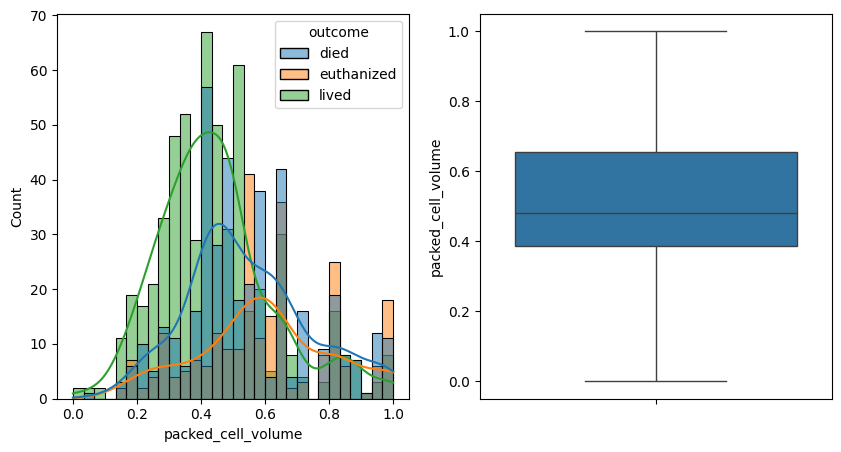

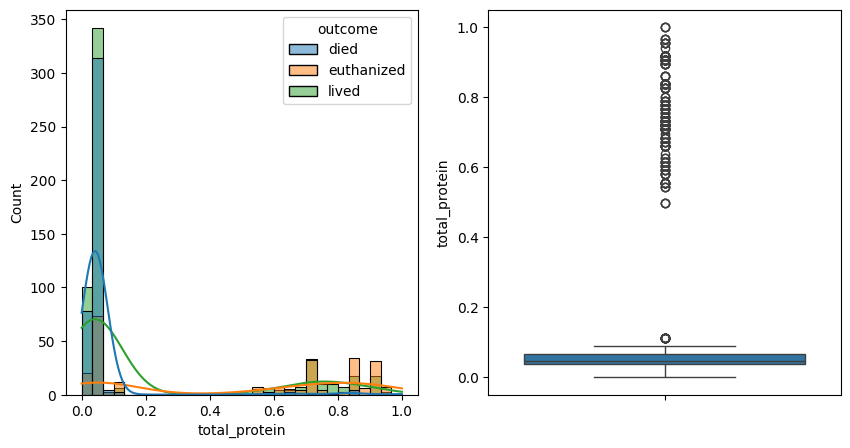

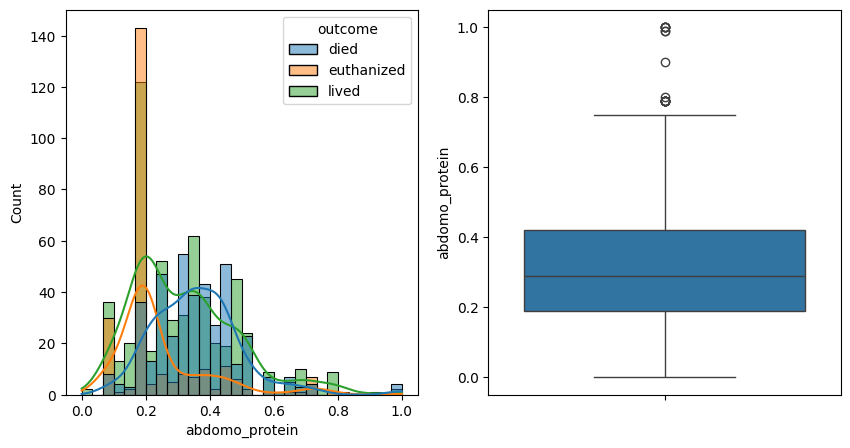

In [74]:
plot_num_features(normalized_train, num_train)

In [72]:
robust_scaler = RobustScaler()
robust_train = train.copy()

for cat in num_train:
    robust_train[[cat]] = robust_scaler.fit_transform(robust_train[[cat]])

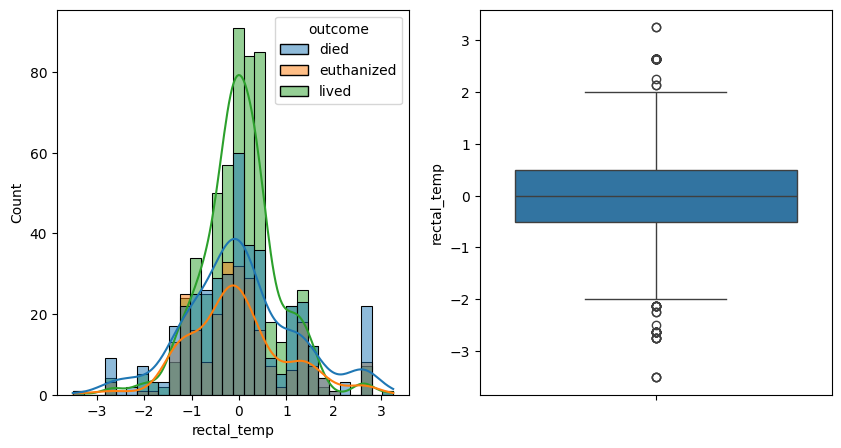

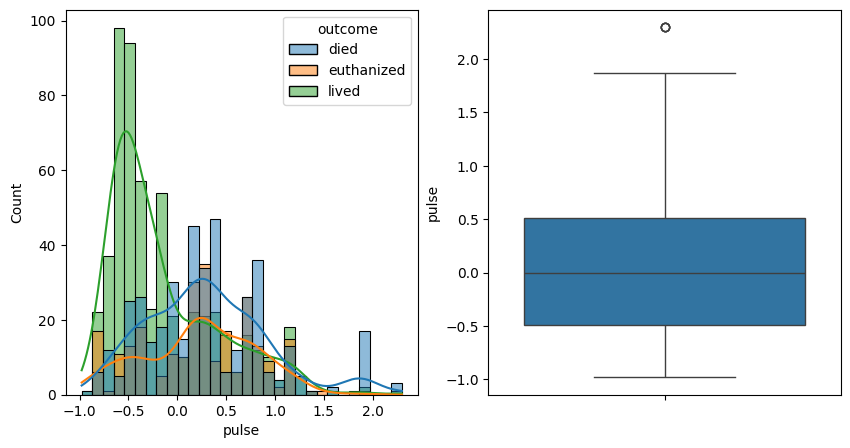

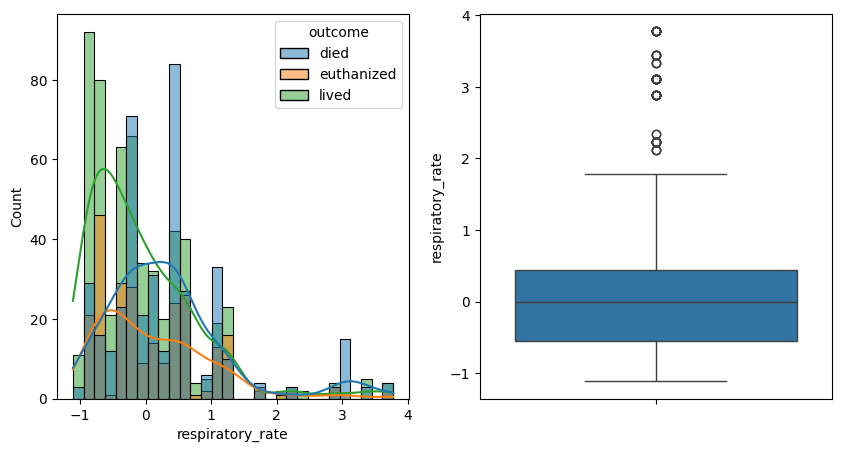

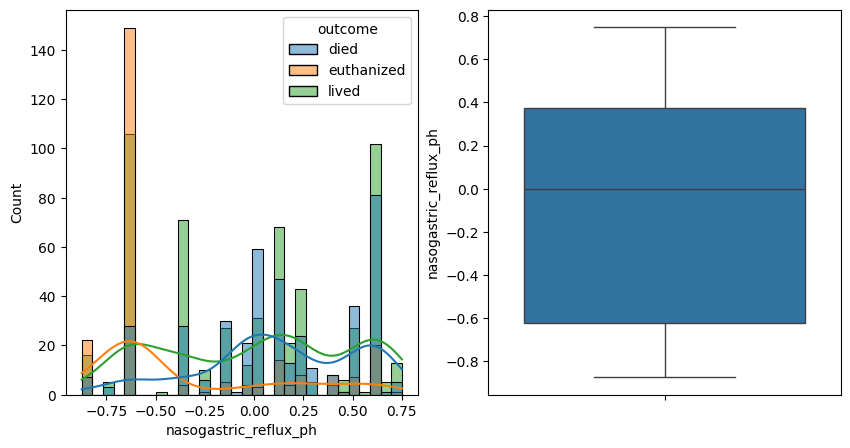

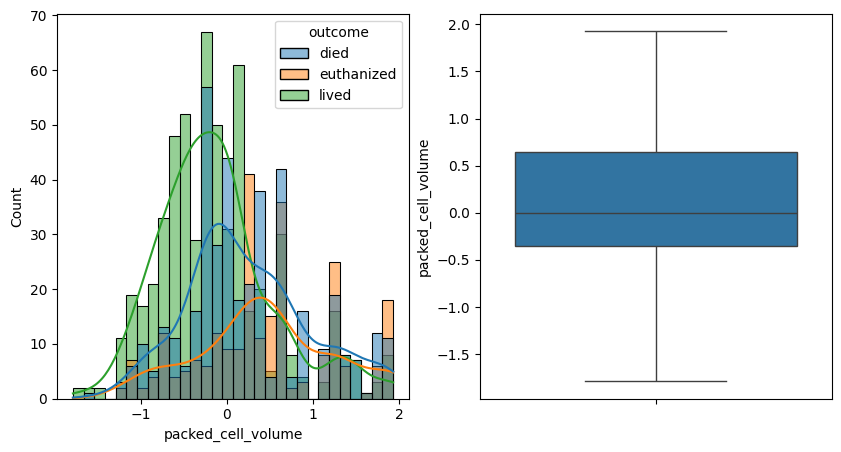

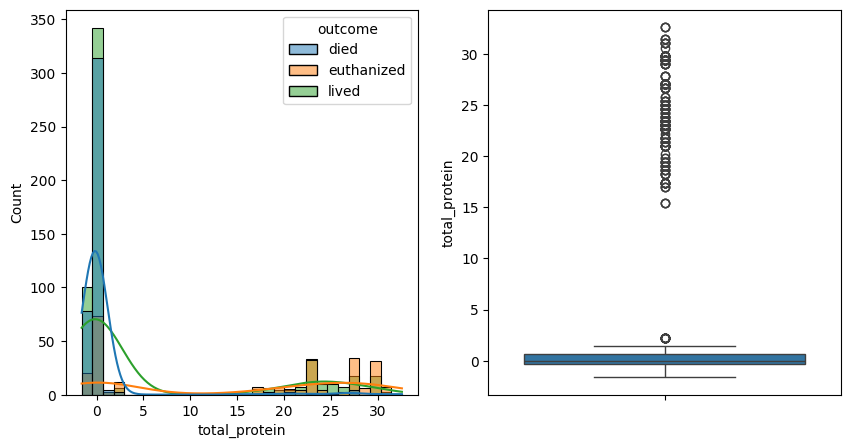

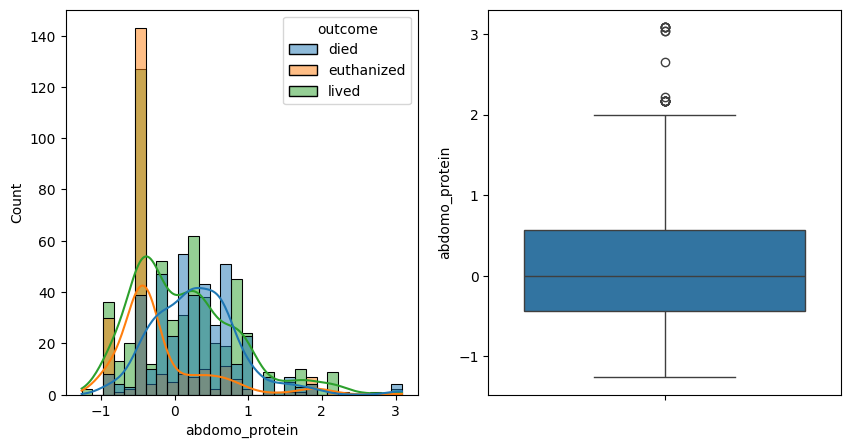

In [75]:
plot_num_features(robust_train, num_train)

## Encoding

In [43]:
cat_train.remove('outcome')

In [40]:
X_train = train.drop(columns='outcome')
y_train = train[['outcome']]

In [44]:
for cat in cat_train:
    X_train[cat] = label_encoder.fit_transform(X_train[cat])

In [45]:
X_train

surgery  age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0           1    0           530001         38.1  132.0              24.0   
1           1    0           533836         37.5   88.0              12.0   
2           1    0           529812         38.3  120.0              28.0   
3           1    0          5262541         37.1   72.0              30.0   
4           0    0          5299629         38.0   52.0              48.0   
...       ...  ...              ...          ...    ...               ...   
1230        1    0           535246         38.5  129.0              48.0   
1231        1    0           528570         37.5   60.0              50.0   
1232        1    1           529685         37.5   84.0              40.0   
1233        1    0           534784         38.1   70.0              16.0   
1234        1    0           528548         38.1   54.0              36.0   

      temp_of_extremities  peripheral_pulse  mucous_membrane  \
0                       1                 4                2   
1                       1                 3                5   
2                       1                 4                6   
3                       0                 4                6   
4                       3                 3                4   
...                   ...               ...              ...   
1230                    1                 4                6   
1231                    1                 4                5   
1232                    3                 4                4   
1233                    3                 4                1   
1234                    3                 3                6   

      capillary_refill_time  ...  rectal_exam_feces  abdomen  \
0                         3  ...                  1        1   
1                         3  ...                  0        1   
2                         1  ...                  3        0   
3                         3  ...                  1        1   
4                         1  ...                  4        4   
...                     ...  ...                ...      ...   
1230                      3  ...                  3        0   
1231                      1  ...                  1        1   
1232                      1  ...                  2        2   
1233                      1  ...                  0        1   
1234                      1  ...                  3        1   

      packed_cell_volume  total_protein  abdomo_appearance  abdomo_protein  \
0                   57.0            8.5                  3             3.4   
1                   33.0           64.0                  3             2.0   
2                   37.0            6.4                  3             3.4   
3                   53.0            7.0                  1             3.9   
4                   47.0            7.3                  1             2.6   
...                  ...            ...                ...             ...   
1230                57.0           66.0                  3             2.0   
1231                35.0            6.4                  3             3.6   
1232                40.0            5.9                  1             7.0   
1233                58.0           74.0                  1             2.0   
1234                45.0            6.0                  0             3.6   

      surgical_lesion  lesion_1  lesion_2  cp_data  
0                   1      2209         0        0  
1                   1      2208         0        0  
2                   1      5124         0        0  
3                   1      2208         0        1  
4                   0         0         0        1  
...               ...       ...       ...      ...  
1230                1      2206         0        0  
1231                1      2209         0        1  
1232                1       400         0        1  
1233                1      2209         0        0  
1234                1  

In [46]:
y_train = target_enc.fit_transform(y_train).ravel()

# TPOT

In [43]:
import tpot
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

In [44]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [45]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='f1_micro', verbosity=2, random_state=1, n_jobs=-1)

In [51]:
model.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.7088032170644286
                                                                              
Generation 2 - Current best internal CV score: 0.7198815455896496
                                                                              
Generation 3 - Current best internal CV score: 0.7198815455896496
                                                                              
Generation 4 - Current best internal CV score: 0.7260840108401083
                                                                              
Generation 5 - Current best internal CV score: 0.7260840108401083
                                                                              
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

In [52]:
model.export('tpot_sonar_best_model.py')

In [53]:
y_train

array([0., 1., 2., ..., 2., 2., 2.])

In [58]:
model.fit(X_train, train['outcome'])

                                                                             
Generation 1 - Current best internal CV score: 0.7158208759506947
                                                                              
Generation 2 - Current best internal CV score: 0.7179845266194598
                                                                              
Generation 3 - Current best internal CV score: 0.7206683276510185
                                                                              
Generation 4 - Current best internal CV score: 0.7206683276510185
                                                                              
Generation 5 - Current best internal CV score: 0.7225478625754
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=5, max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

In [46]:
X_train = train_encoded.drop(columns='outcome')
y_train = train_encoded['outcome']

In [47]:
model.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.7033984614039689
                                                                              
Generation 2 - Current best internal CV score: 0.7033984614039689
                                                                              
Generation 3 - Current best internal CV score: 0.7098850423988112
                                                                              
Generation 4 - Current best internal CV score: 0.7098850423988112
                                                                              
Generation 5 - Current best internal CV score: 0.7106565259200978
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=19, min_samples_split=9, n_estimators=100, subsample=0.60

TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

# Make Pipeline

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [58]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

In [59]:
numerical_pipeline = make_pipeline(
    # outlier removal
    QuantileTransformer(n_quantiles=10, output_distribution='normal', random_state=42),
    # scaler
    # MinMaxScaler(),
    StandardScaler()
)

In [60]:
categorical_pipeline = make_pipeline(
    # imputer
    SimpleImputer(strategy='most_frequent'),
    # Encoder
    # LabelEncoder(),
    # OrdinalEncoder(),
    OneHotEncoder()
)

In [61]:
main_pipeline = make_column_transformer(
    (
        numerical_pipeline,
        make_column_selector(dtype_include=np.number)
    ),
    (
        categorical_pipeline,
        make_column_selector(dtype_include=object)
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [62]:
main_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('quantiletransformer',
                                                  QuantileTransformer(n_quantiles=10,
                                                                      output_distribution='normal',
                                                                      random_state=42)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcf6b7b7250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcf6b7b6770>)],
                  verbose_feature_names_out=False)

In [63]:
target_encoder = OrdinalEncoder(categories=[['died', 'euthanized', 'lived']])

# Modeling

In [64]:
X_train = main_pipeline.fit_transform(train[selected_features])

In [65]:
y_train = target_encoder.fit_transform(train[['outcome']]).ravel()

In [67]:
X_test = main_pipeline.fit_transform(test[selected_features])

Models à tester:
+   GradientBoosting
+   XGB
+   HistGradientBoosting

Dans le dataset 'test' il n'y a pas d'outcome

### GradientBoosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
GB = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features=0.7500000000000001,
    min_samples_leaf=9,
    min_samples_split=6,
    n_estimators=100,
    subsample=0.8,
)

In [70]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features=0.7500000000000001,
                           min_samples_leaf=9, min_samples_split=6,
                           subsample=0.8)

In [71]:
# GB.score(X_test, y_test)

### XGB

In [72]:
from xgboost import XGBClassifier

In [91]:
XGB = XGBClassifier(
    obective='multi:softmax',
    num_classes=3,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=6,
    n_estimators=100,
    n_jobs=1,
    subsample=0.6500000000000001,
    verbosity=0
)


In [92]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=1, num_classes=3,
              num_parallel_tree=None, ...)

In [75]:
# XGB.score(X_test, y_test)

### HistGradientBoosting

In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [77]:
HGB = HistGradientBoostingClassifier(
    learning_rate=0.1,
    l2_regularization=0.1,
    max_depth=25,
    random_state=42,
    scoring='f1_micro',
)

In [80]:
HGB.fit(X_train.toarray(), y_train)

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=25,
                               random_state=42, scoring='f1_micro')

In [79]:
# HGB.score(X_test, y_test)

### Cross val

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
scores_gb = cross_val_score(GB, X_train, y_train, cv=5, scoring='f1_micro')

In [93]:
scores_xgb = cross_val_score(XGB, X_train, y_train, cv=5, scoring='f1_micro')

In [85]:
scores_hgb = cross_val_score(HGB, X_train.toarray(), y_train, cv=5, scoring='f1_micro')

In [86]:
scores_gb

array([0.61133603, 0.65991903, 0.62348178, 0.59109312, 0.64777328])

In [94]:
scores_xgb

array([0.60323887, 0.68016194, 0.63967611, 0.57489879, 0.66396761])

In [88]:
scores_hgb

array([0.57894737, 0.63562753, 0.61538462, 0.56275304, 0.61133603])

### grid search

In [89]:
from sklearn.model_selection import GridSearchCV

In [100]:
xgb_estimator = XGBClassifier(
    # obective='multi:softmax',
    # num_classes=3,
    nthread=4,
    seed=42,
)

In [101]:
xgb_parameters = {
    "max_depth": range(2, 10, 1),
    "n_estimators": range(60, 220, 40),
    "learning_rate": [0.1, 0.01, 0.05]
}

In [104]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=xgb_parameters,
    scoring='f1_micro',
    n_jobs=10,
    cv=5,
    verbose=True
)

In [105]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 